In [1]:
# DIKKAT `INT_1` TEAM UYESI ---> LUTFEN OKU:)) 

# Calismaya baslamadan once Github Desktop'ta Branchinda oldugundan emin ol!
# Main branch'i kendi Branch'ina aktarmayi (merge) unutma
# Sadece ve sadece kendi Branchinda kal!
# Kendi Branch'inda iken calis ve COMMIT yap! 

# Github Proje klasorunde SADECE sana ayrilmis olan klasorunde calis-degisiklik yap. 
# Baskasinin veya ortak bir dosyada asla degisiklik yapma!
# Buddy arkadasin ile ortak notebooklarinizda degisiklik yapmadan once onunla haberles! 

# HIC Emin degilsen PROJENIN GUVENLIGI ICIN github proje klasoru disinda bireysel bir klasorunde datalari kopyalayip alabilir ve lokalinde calisabilirsin. 
# Calismandan emin olduktan sonra gerekli dosyalari Github Proje klasoru icinde sana ayrilmis olan dosya icine ekleyebilirin
# GitHub'a COMMIT-PUSH yaptiginda --> slackta --> GITHUB_UPDATE kanalindan bilgi vermeyi unutma!!

# UTILS classinda isini kolaylastiracak fonksiyonlar ekledik, goz atabilirsin, asagida nasil kullancagini gosterdik.
# Eger sende kullanisli bir fonksiyon bulursan UTILS classina uygun hale getirip-calistirip-test ettikten sonra 
#  benimle paylasirsan ortak utils dosyasina code'unu eklerim, diger arkadaslarinin da isini kolaylastirmis olursun:)

# Okudugun icin tesekkurler iyi calismalar:)) 

# GOLDBERG MED GmbH URETIM-TAKIP-SATIS ANALIZI

**Giriş**

Bu proje, Goldberg Med GmbH’nin satış performansını analiz etmek ve iş süreçlerini iyileştirmek için Keşifsel Veri Analizi (EDA) yöntemlerini kullanmayı amaçlayacaktır. Projenin temel hedefi, mevcut veriyi anlamak, olası sorunları belirlemek ve şirketin stratejik karar alma süreçlerine katkıda bulunmaktır.

**Proje Hedefleri:**

1. Mevcut veri setini inceleyerek verinin yapısını ve özelliklerini anlamak.
2. Satış performansı ile ilgili temel trendleri ve desenleri keşfetmek.
3. Verinin kalitesini artırmak için temizleme işlemleri yapmak (eksik ve anormal verileri tespit ve düzeltme).
4. Elde edilen bulgular doğrultusunda, şirketin pazardaki konumunu güçlendirecek öneriler geliştirmek.

**Proje Adımları:**

1. **Veri Toplama ve Tanımlama:** Şirketten elde edilen satış verileri ve iş süreçlerine dair bilgiler incelenecek ve analiz için hazırlanacaktır.
2. **Keşifsel Veri Analizi (EDA):** 
3. **Veri Temizleme:** Veri setindeki eksik veya hatalı veriler tespit edilerek gerekli düzenlemeler yapılacaktır.
3. **Analiz ve Gorsellestirme:** Verinin genel dağılımı, temel istatistikler ve görselleştirme teknikleri ile incelenecektir. Bu adımda, verinin temel trendleri ve değişkenler arasındaki ilişkiler analiz edilecektir.
4. **Bulgular ve Yorumlar:** Elde edilen analiz sonuçları yorumlanarak, satış performansını etkileyen faktörler üzerine odaklanılacaktır.
5. **Sonuçlar ve Öneriler:** Şirketin satışlarını artırmaya yönelik stratejik öneriler geliştirilecek ve ileriye dönük analizlerin yapılması için yol haritası sunulacaktır.

**Sonuçlar:**

Bu proje, Goldberg Med GmbH’nin satış verilerini analiz ederek, performansı artırmaya yönelik içgörüler sunacaktır. Analiz süreci, şirketin iş süreçlerinde verimliliği artırabilecek potansiyel alanları belirleyecek ve bu alanlarda uygulanabilecek stratejiler geliştirecektir. Elde edilen veriler doğrultusunda, şirketin pazar payını artırmak ve satışları optimize etmek için uygulanabilecek öneriler raporda detaylı olarak sunulacaktır.

## Imports Libraries

In [ ]:
#pip install dateparser

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 
import os
import sys
from scipy import stats
from datetime import datetime,timedelta
import dateparser
import locale


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

## Load Datasets

### df All   (withKartus)

In [2]:
# Dataseti kendi klasorune kopyala al ve direk okut

df0 = pd.read_csv('all_data_merged_satis_uretim_1Kasim.csv')
df_all = df0.copy()

print(df_all.shape)
df_all.head(2)

(32646, 18)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,2018-06-29,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,2018-07-18,NaN,NaN,NaN,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2018-02-14,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN,NaN,NaN,NaN


### df_filtered (noKartus)

- Butun kategoriler dahil - Kartus haric

In [3]:
# 'KARTUS' kategorisini filtreleyip sadece kartusta olan sütunları drop et:
df_noKartus = df_all[df_all['kategori'] != 'KARTUS'].drop(columns=['solusyon_fatura', 'bidon_acilisi', 'aciklama'])

df_filtered = df_noKartus.copy()

print(df_filtered.shape)
df_filtered.head(2)

(2520, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,2018-06-29,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,2018-07-18,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2018-02-14,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN


In [ ]:
# # Save 
# df_filtered.to_csv('allData_noKartus_29Ekim.csv', index=False)

# # read_CSV
# df_noKartus = pd.read_csv('allData_noKartus_29Ekim.csv') #Butun kategoriler dahil - Kartus haric
# df_filtered = df_noKartus.copy()

# print(df_filtered.shape)
# df_filtered.head(2)

### df_kategori  (only otoklav + oksijen)

In [4]:
df_kategori_data = df_filtered[(df_filtered['kategori'] == 'OTOKLAV') |
                         (df_filtered['kategori'] == 'OKSIJEN')].reset_index(drop=True)

df_kategori = df_kategori_data.copy()

print(df_kategori.shape)
df_kategori.head(2)

(1313, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30,NaN,NaN,NaN
1,OTOKLAV,DMO,2018/072,2017-12-28,DMO GENEL MÜDÜRLÜK,T.C. GIDA TARIM VE HAYV. BAKANLIĞI GIDA VE KON...,ANKARA,7717 S,2000 LT ÇİFT KAPILI LABARATUVAR TİP BUHAR STER...,2000 LİTRE,2018/01-002,100 GÜN,2018-06-22,NaN,NaN


In [ ]:
# CLEANED KATEGORIK DATASET KAYDET-OKUT

# # Save
# df_kategori.to_csv('otoklav_oksijen_data_cleaned_2Kasim.csv', index=False)

# # Read
# df_kategori_cleaned = pd.read_csv('otoklav_oksijen_data_cleaned_2Kasim.csv')
# df_kategori = df_kategori_cleaned.copy()

# print(df_kategori.shape)
# df_kategori.head(2)

### df_otoklav

In [5]:
# 'OTOKLAV' kategorisini filtrele
data_otoklav = df_filtered[df_filtered['kategori'] != 'OTOKLAV']
df_otoklav = data_otoklav.copy()

print(df_otoklav.shape)
df_otoklav.head(2)

(1278, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,2018-06-29,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,2018-07-18,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2018-02-14,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN


### df_oksijen

In [6]:
# 'OKSIJEN' kategorisini filtrele
data_oksijen = df_filtered[df_filtered['kategori'] != 'OKSIJEN']
df_oksijen = data_oksijen.copy()

print(df_oksijen.shape)
df_oksijen.head(2)

(2449, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,2018-06-29,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,2018-07-18,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2018-02-14,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN


In [10]:
df_otoklav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 0 to 2519
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         1278 non-null   object 
 1   satis_turu       1275 non-null   object 
 2   siparis_no       1267 non-null   object 
 3   siparis_tarihi   1271 non-null   object 
 4   siparisi_veren   1277 non-null   object 
 5   kurulum_yeri     1277 non-null   object 
 6   il               1270 non-null   object 
 7   urun_modeli      1269 non-null   object 
 8   urun_adi         1083 non-null   object 
 9   litre            1003 non-null   object 
 10  seri_no          1229 non-null   object 
 11  teslim_suresi    1176 non-null   object 
 12  teslim_tarihi    1161 non-null   object 
 13  irsaliye_tarihi  2 non-null      object 
 14  uts_no           3 non-null      float64
dtypes: float64(1), object(14)
memory usage: 159.8+ KB


In [11]:
df_oksijen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2449 entries, 0 to 2448
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         2449 non-null   object 
 1   satis_turu       2446 non-null   object 
 2   siparis_no       2439 non-null   object 
 3   siparis_tarihi   2443 non-null   object 
 4   siparisi_veren   2449 non-null   object 
 5   kurulum_yeri     2449 non-null   object 
 6   il               2428 non-null   object 
 7   urun_modeli      2380 non-null   object 
 8   urun_adi         2315 non-null   object 
 9   litre            2243 non-null   object 
 10  seri_no          2335 non-null   object 
 11  teslim_suresi    2180 non-null   object 
 12  teslim_tarihi    2078 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  uts_no           0 non-null      float64
dtypes: float64(1), object(14)
memory usage: 306.1+ KB


## Import Utils Modul

In [4]:
#  FONKSIYONLARIMIZI DERLEDIGIMIZ `UTILS` ADINDAKI MODULU BU NOTEBOOK ICINE IMPORT EDIYORUZ

import sys

# utils1.py dosyasının bulunduğu dizini ham dize olarak ekleyin
sys.path.append(r"C:\Users\duygu\Desktop\00-GitHub-Repo\00-1INTERNSHIP\10_UTILITIES")

# 'utils.py' dosyasında olusturulan Utils sınıfını import et
from utilsAnalysis import UtilsAnalysis

# utils1 icindeki tum class'lardan bir nesne oluştur
utils = UtilsAnalysis()

# utils nesnesindeki tüm fonksiyonları ve öznitelikleri listelemek için
dir(utils)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_date_operation',
 'clean_and_standardize_date',
 'detect_anomalies',
 'df',
 'duplicate_values',
 'find_non_numeric_values',
 'get_value_count',
 'groupby_get_null_values',
 'groupby_get_values',
 'missing_values',
 'na_ratio_plot',
 'numeric_summary',
 'object_summary']

##### Utils class'indan Fonk Cagirma:

In [30]:
# hangi dataset uzerinde fonksiyonlari uygulamak istiyorsan o df'i atama yap
# `utils` objesi ile bu classta bulunan tum fonksiyonlari direk belirlenen df uzerinde uygulayacak.

utils.df = df_all

In [31]:
help(utils.missing_values) # utils classta ekledigimiz bir fonksiyon hakkinda bilgi edinebiliriz

Help on method missing_values in module utilsAnalysis:

missing_values() method of utilsAnalysis.UtilsAnalysis instance
    DataFrame'deki eksik değerlerin sayısını ve yüzdesini hesaplar.



# EXPLORATORY DATA ANALYSIS (EDA)¶

## Understanding the the Data

In [ ]:
# BU NOTEBOOKTA TANIMLANAN DATASETLER:

utils.df = df_all        # df_all - with Kartus
#utils.df = df_filtered   # df -without Kartus
#utils.df = df_kategori    # otoklav + oksijen

In [13]:
print('Dataset all merged with Kartus', df_all.shape)
df_all.groupby('kategori').apply(lambda x: x.notnull().sum())

Dataset all merged with Kartus (32646, 18)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
kategori,,,,,,,,,,,,,,,,,,
AMELIYAT MASASI,475,475,475,475,475,475,473,475,475,271,438,423,408,0,0,0,0,0
HIDROJEN PEROKSIT,135,135,134,134,135,135,134,135,135,135,134,135,126,2,0,0,0,0
KARTUS,30126,26963,25234,28317,28697,0,28585,0,28794,0,30038,0,3,0,11627,5369,5369,0
OKSIJEN,71,71,70,70,70,70,70,70,10,2,70,43,65,0,0,0,0,3
OTOKLAV,1242,1242,1242,1242,1242,1242,1228,1181,1242,1242,1176,1047,982,6,0,0,0,0
REVERSE OSMOS,204,201,195,199,204,204,202,204,70,202,204,192,190,0,0,0,0,0
YIKAMA,393,393,393,393,393,393,391,385,393,393,383,383,372,0,0,0,0,0


In [14]:
print('Dataset without Kartus: ', df_filtered.shape)
df_filtered.groupby('kategori').apply(lambda x: x.notnull().sum())

Dataset without Kartus:  (2520, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
kategori,,,,,,,,,,,,,,,
AMELIYAT MASASI,475,475,475,475,475,475,473,475,475,271,438,423,408,0,0
HIDROJEN PEROKSIT,135,135,134,134,135,135,134,135,135,135,134,135,126,2,0
OKSIJEN,71,71,70,70,70,70,70,70,10,2,70,43,65,0,3
OTOKLAV,1242,1242,1242,1242,1242,1242,1228,1181,1242,1242,1176,1047,982,6,0
REVERSE OSMOS,204,201,195,199,204,204,202,204,70,202,204,192,190,0,0
YIKAMA,393,393,393,393,393,393,391,385,393,393,383,383,372,0,0


In [15]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         2520 non-null   object 
 1   satis_turu       2517 non-null   object 
 2   siparis_no       2509 non-null   object 
 3   siparis_tarihi   2513 non-null   object 
 4   siparisi_veren   2519 non-null   object 
 5   kurulum_yeri     2519 non-null   object 
 6   il               2498 non-null   object 
 7   urun_modeli      2450 non-null   object 
 8   urun_adi         2325 non-null   object 
 9   litre            2245 non-null   object 
 10  seri_no          2405 non-null   object 
 11  teslim_suresi    2223 non-null   object 
 12  teslim_tarihi    2143 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  uts_no           3 non-null      float64
dtypes: float64(1), object(14)
memory usage: 295.4+ KB


In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32646 entries, 0 to 32645
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         32646 non-null  object 
 1   satis_turu       29480 non-null  object 
 2   siparis_no       27743 non-null  object 
 3   siparis_tarihi   30830 non-null  object 
 4   siparisi_veren   31216 non-null  object 
 5   kurulum_yeri     2519 non-null   object 
 6   il               31083 non-null  object 
 7   urun_modeli      2450 non-null   object 
 8   urun_adi         31119 non-null  object 
 9   litre            2245 non-null   object 
 10  seri_no          32443 non-null  object 
 11  teslim_suresi    2223 non-null   object 
 12  teslim_tarihi    2146 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  aciklama         11627 non-null  object 
 15  solusyon_fatura  5369 non-null   object 
 16  bidon_acilisi    5369 non-null   object 
 17  uts_no      

In [23]:
print('Only Otoklav + Oksijen Merged Dataset: ', df_kategori.shape)
df_kategori.groupby('kategori').apply(lambda x: x.notnull().sum())

Only Otoklav + Oksijen Merged Dataset:  (1313, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
kategori,,,,,,,,,,,,,,,
OKSIJEN,71,71,70,70,70,70,70,70,10,2,70,43,65,0,3
OTOKLAV,1242,1242,1242,1242,1242,1242,1228,1181,1242,1242,1176,1047,982,6,0


In [18]:
df_otoklav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 0 to 2519
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         1278 non-null   object 
 1   satis_turu       1275 non-null   object 
 2   siparis_no       1267 non-null   object 
 3   siparis_tarihi   1271 non-null   object 
 4   siparisi_veren   1277 non-null   object 
 5   kurulum_yeri     1277 non-null   object 
 6   il               1270 non-null   object 
 7   urun_modeli      1269 non-null   object 
 8   urun_adi         1083 non-null   object 
 9   litre            1003 non-null   object 
 10  seri_no          1229 non-null   object 
 11  teslim_suresi    1176 non-null   object 
 12  teslim_tarihi    1161 non-null   object 
 13  irsaliye_tarihi  2 non-null      object 
 14  uts_no           3 non-null      float64
dtypes: float64(1), object(14)
memory usage: 159.8+ KB


In [19]:
df_oksijen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2449 entries, 0 to 2448
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         2449 non-null   object 
 1   satis_turu       2446 non-null   object 
 2   siparis_no       2439 non-null   object 
 3   siparis_tarihi   2443 non-null   object 
 4   siparisi_veren   2449 non-null   object 
 5   kurulum_yeri     2449 non-null   object 
 6   il               2428 non-null   object 
 7   urun_modeli      2380 non-null   object 
 8   urun_adi         2315 non-null   object 
 9   litre            2243 non-null   object 
 10  seri_no          2335 non-null   object 
 11  teslim_suresi    2180 non-null   object 
 12  teslim_tarihi    2078 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  uts_no           0 non-null      float64
dtypes: float64(1), object(14)
memory usage: 306.1+ KB


### Tum Kategorileri Incele:

In [19]:
# Kategorilere gore secili sutunlardaki toplam VALUE sayisi:
utils.df = df_all

utils.groupby_get_values() # siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen groupby yapılacak sütunu seçiniz (örneğin: kategori, teslim_tarihi vb.): kategori

Değerlerini görmek istediğiniz diğer sütunları virgülle ayırarak giriniz (örneğin: fiyat, adet, tarih): siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

# Gruplandırılmış DataFrame (Dolu Değerler):



,kategori,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,AMELIYAT MASASI,475,423,408,0
1,HIDROJEN PEROKSIT,134,135,126,2
2,OKSIJEN,70,43,65,0
3,OTOKLAV,1242,1047,982,6
4,REVERSE OSMOS,199,192,190,0
5,YIKAMA,393,383,372,0


In [34]:
# Kategorilere gore secili sutunlardaki toplam NULL sayisi:
utils.df = df_all

utils.groupby_get_null_values() # #siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen index olarak kullanılacak sütunu seçiniz (örneğin: kategori, teslim_tarihi vb.): kategori

Null değerlerini görmek istediğiniz diğer sütunları virgülle ayırarak giriniz (örneğin: fiyat, adet, tarih): siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

# Gruplandırılmış DataFrame (Null Değerler):



,kategori,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,AMELIYAT MASASI,0,52,67,475
1,HIDROJEN PEROKSIT,1,0,9,133
2,KARTUS,1809,30126,30123,30126
3,OKSIJEN,1,28,6,71
4,OTOKLAV,0,195,260,1236
5,REVERSE OSMOS,5,12,14,204
6,YIKAMA,0,10,21,393


### Summary Statistics 

In [40]:
# SUMMARY STATISTICS OF CATEGORICAL DTYPES

utils.df = df_filtered # fonk bu df uzerinde kullanabilmek icin

utils.object_summary()

1. Data shape (rows, columns): (2520, 15)
2. Number of duplicate rows: 79


,Dtype,Counts,Nulls,NullPercent,Top,Frequency,Uniques,UniqueValues
kategori,object,2520,0,0.000000,OTOKLAV,1242,6,"AMELIYAT MASASI, OTOKLAV, HIDROJEN PEROKSIT, R..."
satis_turu,object,2517,3,0.119048,YURTDIŞI,1033,23,"ÖZEL, DEMO, YURTDIŞI, DMO, İHALE, 2021 DE SATI..."
siparis_no,object,2509,11,0.436508,2020/362,3,2316,"2018/006, 2018/007, 2018/008, 2018/009, 2018/0..."
siparis_tarihi,object,2513,7,0.277778,11/12/2020 0:00,60,862,"6/29/2018, 2/14/2018, 10/23/2018, 9/3/2018, 2/..."
siparisi_veren,object,2519,1,0.039683,KAMBOÇYA,137,519,"ÖZEL FSM TIP MERKEZİ, DEMO, İZMİR KATİP ÇELEBİ..."
kurulum_yeri,object,2519,1,0.039683,KAMBOÇYA,137,775,"ÖZEL FSM TIP MERKEZİ, DERİNCE EĞİTİM VE ARAŞTI..."
il,object,2498,22,0.873016,İSTANBUL,270,170,"İSTANBUL, KOCAELİ, İZMİR, TAYLAND, AZERBEYCAN,..."
urun_modeli,object,2450,70,2.777778,GOLDBERG 5S,215,176,"GOLDBERG 5S, ERM 2000 F, STR 2000 F, 2000 F, G..."
urun_adi,object,2325,195,7.738095,AMELİYAT MASASI,475,123,"AMELİYAT MASASI, 422 LT ÇİFT KAPILI OTOKLAV Cİ..."
litre,object,2245,275,10.912698,*,269,59,"*, OBEZ, nan, aşağıda, 422 LİTRE, 2000 LİTRE, ..."


In [41]:
# SUMMARY STATISTICS OF NUMERICAL DTYPES

utils.numeric_summary()

1. Data shape (rows, columns): (2520, 15)
2. Number of duplicate rows: 79


,Dtype,Counts,Nulls,NullPercent,Mean,Std,Min,25%,50% (Median),75%,Max
uts_no,float64,3,2517,99.880952,8.697610e+12,0.0,8.697610e+12,8.697610e+12,8.697610e+12,8.697610e+12,8.697610e+12


### Missing Values

In [42]:
utils.missing_values()

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
kategori,0,0.00%
satis_turu,3,0.12%
siparis_no,11,0.44%
siparis_tarihi,7,0.28%
siparisi_veren,1,0.04%
kurulum_yeri,1,0.04%
il,22,0.87%
urun_modeli,70,2.78%
urun_adi,195,7.74%
litre,275,10.91%


Eksik değer sayısı (0'dan fazla olan sütunlar):
satis_turu            3
siparis_no           11
siparis_tarihi        7
siparisi_veren        1
kurulum_yeri          1
il                   22
urun_modeli          70
urun_adi            195
litre               275
seri_no             115
teslim_suresi       297
teslim_tarihi       377
irsaliye_tarihi    2512
uts_no             2517
dtype: int64


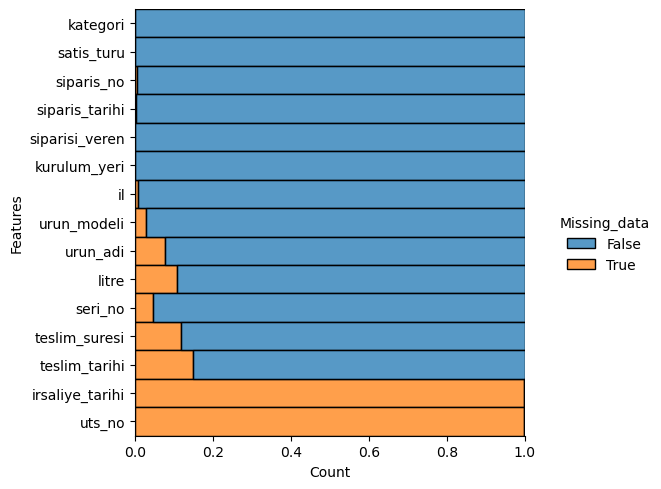

In [43]:
utils.na_ratio_plot()

### Genel Ozet:

1. **Eksik Değerler**: 
   - `irsaliye_tarihi` sütununda çok yüksek bir eksik veri oranı (%99.68) bulunmakta, bu da bu sütunun büyük oranda boş olduğunu gösterir.
   - `uts_no` sütunu da benzer şekilde %99.88 oranında eksik veri içermekte olup yalnızca 3 değer bulunmaktadır. Bu nedenle, `uts_no` sütununun analiz sürecinde sınırlı bir katkısı olabilir.
   - `teslim_tarihi` (%14.96) ve `teslim_suresi` (%11.78) sütunlarında da dikkat çeken eksik veri oranları bulunmaktadır. 
   - `litre` (%10.91) sütunu da önemli bir eksik veri oranına sahiptir.

2. **Veri Dağılımı ve Sıklık**:
   - `kategori` sütununda en sık görülen değer "OTOKLAV" olup, 1242 kez tekrarlanmış ve bu sütunda 6 benzersiz değer bulunmakta.
   - `satis_turu` sütununda en sık görülen değer "YURTDIŞI" olup, 1033 kez tekrarlanmış.
   - `il` sütununda en sık rastlanan değer "İSTANBUL" olarak görünmektedir ve 270 kez geçmektedir.
   - `urun_adi` sütununda 123 farklı benzersiz değer bulunmakta, en sık görülen değer ise "AMELİYAT MASASI" olarak 475 kez geçmektedir.

3. **Sayısal Sütunlar**:
   - `uts_no` sütununda yalnızca 3 adet veri mevcut olup, geri kalanı eksiktir (%99.88 eksik veri). Ayrıca, bu sütundaki tüm dolu değerler aynı olup (`8.697610e+12`), bu nedenle varyans sıfırdır. Bu sütun analize katkı sağlamayabilir ve gerektiğinde çıkarılması düşünülebilir.

4. **Genel Gözlemler**:
   - `irsaliye_tarihi` ve `uts_no` sütunları, yüksek eksik veri oranları nedeniyle analiz açısından dikkatle değerlendirilmelidir. Bu sütunlar analizlerde ihmal edilebilir veya eksik veriler doldurulabilir.
   - `siparis_no`, `siparis_tarihi`, `siparisi_veren`, ve `kurulum_yeri` sütunları nispeten daha az eksik veri içermekte olup veri kalitesi açısından güvenilirdir.
   - `kategori`, `satis_turu` ve `il` gibi kategorik sütunlarda, bazı değerlerin aşırı yoğunlaştığı (örneğin, `YURTDIŞI` ve `İSTANBUL`) gözlemlenmektedir. 

Bu özet, veri setindeki eksik veri oranlarının analiz için önemini ve veri temizliği gerekliliklerini belirlemeye yardımcı olur. Özellikle `uts_no` gibi sabit ve çok eksik veriye sahip sütunların analizde sınırlı katkı sağlayabileceği göz önünde bulundurulmalıdır.

##### Features Aciklama:

##### 1. `uts_no` Sütunu
- **Anlamı**: `uts_no`, muhtemelen **Ürün Takip Sistemi** (ÜTS) numarasını temsil eder. ÜTS, sağlık sektöründe veya belirli cihazların izlenmesi için kullanılan bir sistemdir ve her ürüne özel benzersiz bir numara sağlar.
- **Potansiyel Önemi**: Ürünlerin izlenebilirliği açısından önemli bir veri olabilir. ÜTS numaraları, ürünlerin hangi partide üretildiği, hangi dağıtıcıya gönderildiği gibi bilgilere erişim sağlamak için kullanılabilir. Ancak bu veri yalnızca çok spesifik ürünler için geçerli olduğundan, veri setinin büyük kısmında boş kalmış olabilir.
- **Analiz İçin Gerekliliği**: Eğer analiz yalnızca belirli ürünlerin takibini içeriyorsa, bu sütun önemli olabilir. Ancak, veri setinin büyük kısmında bu bilgi eksikse ve ÜTS numarası olmayan ürünlerin analizi yapılacaksa, sütun ihmal edilebilir veya çıkarılabilir.
- **Karar**: Bu sütun %99.88 eksik veri oranına sahip olduğundan, genel analizlerde etkili bir katkı sağlayamayabilir. Belirli bir ÜTS takibi yapılmayacaksa, bu sütun **ignore** edilebilir.

##### 2. `irsaliye_tarihi` Sütunu
- **Anlamı**: `irsaliye_tarihi`, ürünlerin veya hizmetlerin teslimatının yapıldığı tarihin kayıtlı olduğu sütundur. İrsaliye, bir malın alıcıya ulaştığını veya sevkiyatın yapıldığını gösteren resmi bir belgedir ve ticari işlemlerde önemlidir.
- **Potansiyel Önemi**: Teslimat tarihi, lojistik süreçlerin ve zamanında teslim oranlarının analizinde kritik bir faktördür. Teslimat süreçleriyle ilgili analizlerde, zamanında teslim edilip edilmediği, teslim sürelerinin optimize edilmesi gibi durumları incelemek için kullanılabilir.
- **Analiz İçin Gerekliliği**: İrsaliye tarihlerinin eksikliği, teslimat sürecini analiz etmeyi zorlaştırabilir. Eğer lojistik süreçlerin analizi, teslimat sürelerinin değerlendirilmesi veya teslimat performansının ölçülmesi gibi konular analiz için kritik değilse, bu sütun ihmal edilebilir.
- **Karar**: Bu sütun %99.68 eksik veri oranına sahip olduğundan, teslimat süreçleriyle ilgili bir analiz yapılmayacaksa **ignore** edilebilir. Ancak teslimat performansı veya zamanında teslimat oranları analiz edilecekse, eksik verilerin tamamlanması veya doldurulması gerekebilir.

##### 3. `teslim_tarihi` ve `teslim_suresi` Sütunları
- **Anlamları**: `teslim_tarihi`, siparişin müşteriye teslim edildiği tarihi, `teslim_suresi` ise siparişin teslim süresini (gün olarak) ifade eder.
- **Potansiyel Önemi**: Teslimat tarihi ve süresi, müşteri memnuniyeti, sipariş süreçlerinin etkinliği ve lojistik performansı gibi konular için önemlidir. Bu bilgilerle, siparişlerin zamanında teslim edilip edilmediği, teslimat sürelerinin optimize edilmesi gibi analizler yapılabilir.
- **Analiz İçin Gerekliliği**: Eğer müşteri memnuniyeti, lojistik süreçlerin performansı veya zamanında teslim oranları analiz edilecekse, bu sütunlar önemlidir. Ancak ürün bilgisi veya satış gibi süreçler analiz edilecekse, bu sütunların eksikliği analiz sonuçlarını olumsuz etkilemez.
- **Karar**: %10’un üzerinde eksik veri oranına sahip olmalarına rağmen, teslimat süreçleriyle ilgili analiz yapılacaksa eksik veriler tamamlanabilir. Ancak teslimat süreçleri analizin odak noktası değilse, bu sütunlar **ignore** edilebilir.

##### 4. `litre` Sütunu
- Urun adi veya modelde litre bilgisi zaten var!
- **Anlamı**: Bu sütun, ürünlerin miktarını litre cinsinden ifade ediyor olabilir.
- **Potansiyel Önemi**: Litre bilgisi, sıvı bazlı ürünler için önemlidir. Özellikle ürün bazında miktar analizleri, tüketim miktarları veya stok yönetimi gibi konular için bu veri faydalı olabilir.
- **Analiz İçin Gerekliliği**: Eğer stok yönetimi, ürün tüketim miktarı gibi metrikler analiz ediliyorsa litre bilgisi önemlidir. Ancak analizin odak noktası ürün miktarı değilse, bu sütunun eksik olması analiz sonuçlarını etkilemez.
- **Karar**: %10.91 oranında eksik veriye sahip olan `litre` sütunu, miktar veya stok analizleri yapılmayacaksa **ignore** edilebilir.


##### 5. **Diğer Sütunlar**:
   - **Önemli Eksik Veri İçermeyen Sütunlar**: `kategori`, `satis_turu`, `siparis_no`, `siparis_tarihi`, `siparisi_veren`, `kurulum_yeri`, `il`, `urun_modeli`, ve `urun_adi` sütunları nispeten düşük eksik veri oranlarına sahiptir ve genel analizler için güvenilir sayılabilir.
   - **Analiz İçin Gerekliliği**: Bu sütunlar sipariş bilgileri, müşteri bilgileri ve ürün özellikleri gibi temel verileri içerdiğinden, genel analizlerde kullanılmaları faydalı olacaktır.

---

##### Genel Değerlendirme ve Öneri:
- **Ignore Edilebilecek Sütunlar**: `uts_no` ve `irsaliye_tarihi`, yüksek eksik veri oranları nedeniyle genel analizlerde ihmal edilebilir.
- **Kısmi Kullanılabilir Sütunlar**: `teslim_tarihi`, `teslim_suresi`, ve `litre` sütunları, yalnızca ilgili analizler (teslimat veya stok analizi) yapılacaksa eksik verilerle dikkate alınabilir veya tamamlanabilir.
- **Önemli Sütunlar**: Sipariş, ürün, müşteri ve lokasyon bilgileri içeren diğer sütunlar genel analizlerde güvenle kullanılabilir.


Analiz amacı, müşteri memnuniyeti, lojistik süreçler, miktar bazlı ürün analizi gibi alanları içermiyorsa, bu sütunların bir kısmını **ignore etmek** analiz sürecini daha verimli hale getirebilir.

# OTOKLAV - OKSIJEN FEATURES

## Data Cleaning and Transformation

######  (df_kategori: Merged Otoklav ve Oksijen dataseti )

In [8]:
# TUM SUTUNLARI BOS OLAN SATIRLARI FILTRELE VE IGNORE ET;

df_kategori[df_kategori['siparis_no'].isnull()
        & df_kategori['siparisi_veren'].isnull()
        & df_kategori['siparis_tarihi'].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1243,OKSIJEN,YURTDIŞI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 1243. (otoklav+O2) indexli satır tamamen BOS olduğu için filtrelendi (sadece satis_turu degeri var-bos satir yani !!!!)

In [9]:
# 1.Update:  df_kategori - Otoklav 1243. index INGORE ET;

df_kategori = df_kategori[(df_kategori['siparis_no'].notnull()) | 
                        (df_kategori['siparisi_veren'].notnull()) | 
                        (df_kategori['siparis_tarihi'].notnull())]

In [153]:
# AKTARILAN SATIS_TURU SATIRLARINI IGNORE ET

# Filtrelemek istediğiniz kategori ifadeleri listesi
filter_values = [
    '2024 e aktarıldı',
    '2024 YILANA AKTARILDI', 
    '2023 YILINA AKTARILDI',
    '2023 YILANA AKTARILDI',
    '2022 DE SATIŞ OLDU',
    '2021 DE DEMO OLARAK GİTTİ'
]

# Kategori sütununda belirtilen ifadelerle eşleşen satırları filtreleme
selected_rows = df_kategori[df_kategori['satis_turu'].isin(filter_values)]

# Filtrelenmiş DataFrame'i gösterme
selected_rows

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
890,OTOKLAV,2024 YILANA AKTARILDI,2022/485,2022-09-14,2024 YILANA AKTARILDI,2024 YILANA AKTARILDI,NaN,NaN,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,NaN,NaN,NaN,NaN,NaN
891,OTOKLAV,2024 YILANA AKTARILDI,2022/486,2022-09-14,2024 YILANA AKTARILDI,2024 YILANA AKTARILDI,NaN,NaN,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,NaN,NaN,NaN,NaN,NaN
892,OTOKLAV,2023 YILANA AKTARILDI,2022/490,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN
893,OTOKLAV,2023 YILANA AKTARILDI,2022/491,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN
894,OTOKLAV,2023 YILANA AKTARILDI,2022/492,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN
895,OTOKLAV,2023 YILANA AKTARILDI,2022/493,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN
896,OTOKLAV,2023 YILANA AKTARILDI,2022/494,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN
897,OTOKLAV,2023 YILANA AKTARILDI,2022/495,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN
898,OTOKLAV,2023 YILANA AKTARILDI,2022/496,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN
899,OTOKLAV,2023 YILANA AKTARILDI,2022/497,2022-12-01,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,2023 YILANA AKTARILDI,NaN,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,NaN,NaN,NaN,NaN,NaN


In [154]:
# Belirtilen filtre değerlerine uyan satırları ignore et
df_kategori = df_kategori[~df_kategori['satis_turu'].isin(filter_values)]

# check
df_kategori[df_kategori['satis_turu'].isin(filter_values)]


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


## **siparis_tarihi**

Genel olarak, aynı `siparis_no` (sipariş numarası) değerine sahip satırlarda **sipariş tarihinin de aynı olması beklenir**. Çünkü sipariş numarası, genellikle belirli bir siparişi benzersiz olarak tanımlar ve bu siparişin belirli bir tarihte verildiğini ifade eder.

- > Genel kurala göre, aynı `siparis_no` değerine sahip satırların `siparis_tarihi` değerleri de aynı olmalıdır. Ancak değişim veya güncelleme gibi özel durumlarda bu tarihlerin farklı olması mümkündür.

##### Eksik `siparis_tarihi` Değerlerini Doldurma Önerileri:

- **Aynı `siparis_no` ve `satis_turu`**: Aynı sipariş numarasına ve satış türüne sahip satırların `siparis_tarihi` dolu ise, eksik olan satırlar bu tarihe göre doldurulabilir.
- **`teslim_tarihi` ve `teslim_suresi`**: `siparis_tarihi` eksikse ve `teslim_tarihi` ile `teslim_suresi` mevcutsa, teslim tarihinden teslim süresi kadar geri gidilerek sipariş tarihi hesaplanabilir.
- **Benzer `kategori`, `urun_modeli`, `siparisi_veren` Kombinasyonları**: Aynı kategori, model ve sipariş veren bilgisi ile yapılan siparişlerdeki tarihleri inceleyerek eksik tarihleri tahmin etmek mümkündür.

Bu analiz, eksik `siparis_tarihi` değerlerini doldurmak için diğer sütunlardan nasıl faydalanılabileceğine dair bir yol haritası sunar. Ancak, veri kalitesini bozmamak adına, yeterli bilgi olmadığı durumlarda tarihleri eksik bırakmak daha güvenli olabilir.

In [59]:
utils.df = df_kategori

utils.get_value_count()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: siparis_tarihi


,siparis_tarihi,counts,percent
0,2020-11-12 00:00:00,60,4.57%
1,2018-09-19,46,3.51%
2,2020-06-04 00:00:00,43,3.28%
3,2022-11-02,36,2.74%
4,2021-03-13,34,2.59%
5,2022-01-06,25,1.91%
6,2019-12-17 00:00:00,25,1.91%
7,2019-11-29,16,1.22%
8,2022-09-14,16,1.22%
9,2024-01-10,14,1.07%


### Anomalies:

In [48]:
# siparis_tarihi
utils.df = df_kategori  # sadece Otoklav ve O2 de 

utils.find_non_numeric_values() 

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: siparis_tarihi
'siparis_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', ' . ', '-', '/', ':'}

In [26]:
# Tum datasetteki Anormal degerler (+kartus dahil): siparis_tarihi
utils.df = df_all 

utils.find_non_numeric_values() 

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: siparis_tarihi
'siparis_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', ' . ', ' AKSARAY ', ' DMO ', '.', '/', ':'}

### Missings:

`siparis_tarihi` sütunundaki `null` değerlerin doldurulmasında, diğer sütunlarla ilişkisini şu şekilde değerlendirebiliriz:

1. **`siparis_no`**: **En güçlü ilişki**. Aynı sipariş numarası, aynı sipariş tarihini yansıtmalıdır. Eksik değerleri doldururken ilk olarak aynı sipariş numarasına sahip satırlardaki `siparis_tarihi` kullanılabilir.

2. **`satis_turu`**: Satış türü (örneğin, "ÖZEL", "DEĞİŞİM") sipariş tarihini etkileyebilir. Değişim gibi durumlarda orijinal tarihten farklı bir tarih olabilir, dolayısıyla ilişki doğrudan değildir ancak farklı türlerdeki tarihleri karşılaştırmak için bir referans olarak kullanılabilir.

3. **`siparisi_veren` ve `kurulum_yeri`**: Aynı müşterinin (siparişi veren) ve aynı kurulum yeri olan siparişler, benzer tarihlerde yapılmış olabilir. Aynı `siparisi_veren` ve `kurulum_yeri` kombinasyonuna sahip siparişlerde tarih tahmin edilebilir.

4. **`teslim_suresi` ve `teslim_tarihi`**: Sipariş tarihini dolaylı olarak tahmin etmeye yardımcı olabilir. Eğer `teslim_tarihi` doluysa, `teslim_suresi` kullanılarak sipariş tarihi yaklaşık olarak hesaplanabilir (`teslim_tarihi - teslim_suresi`).

5. **`irsaliye_tarihi`**: İrsaliye tarihi varsa, bu tarih siparişin yakın bir zaman diliminde gerçekleştiğini gösterebilir. İrsaliye tarihine göre sipariş tarihi tahmin edilebilir.

6. **`kategori`, `urun_modeli`, `urun_adi`, `litre` ve `seri_no`**: Sipariş tarihiyle doğrudan bağlantılı değillerdir, ancak aynı ürünü veya kategoriyi içeren siparişler arasında belirli bir dönemsel düzen varsa, tahmin için yardımcı olabilir.

**Sonuç**: `siparis_no`, `teslim_tarihi` ve `teslim_suresi`, `siparisi_veren`, `kurulum_yeri` gibi sütunlar en yüksek etkiye sahip. `irsaliye_tarihi` dolaylı olarak kullanılabilir. Bu sütunlar, eksik `siparis_tarihi` değerlerini tahmin etmek için en mantıklı referanslardır.

In [147]:
utils.df = df_kategori

utils.groupby_get_null_values()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen index olarak kullanılacak sütunu seçiniz (örneğin: kategori, teslim_tarihi vb.): kategori

Null değerlerini görmek istediğiniz diğer sütunları virgülle ayırarak giriniz (örneğin: fiyat, adet, tarih): siparis_no,siparis_tarihi,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi

# Gruplandırılmış DataFrame (Null Değerler):



,kategori,siparis_no,siparis_tarihi,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,OKSIJEN,0,0,0,27,5,70
1,OTOKLAV,0,0,66,195,260,1236


### Formatting siparis_tarihi

In [10]:
df_copy = df_kategori.copy()
df_copy.head(2)

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30,NaN,NaN,NaN
1,OTOKLAV,DMO,2018/072,2017-12-28,DMO GENEL MÜDÜRLÜK,T.C. GIDA TARIM VE HAYV. BAKANLIĞI GIDA VE KON...,ANKARA,7717 S,2000 LT ÇİFT KAPILI LABARATUVAR TİP BUHAR STER...,2000 LİTRE,2018/01-002,100 GÜN,2018-06-22,NaN,NaN


In [13]:
# orjinal tarihler -> yyyy/mm/dd

print(df_kategori['siparis_tarihi'].info())
df_kategori['siparis_tarihi'].unique()

<class 'pandas.core.series.Series'>
Index: 1312 entries, 0 to 1312
Series name: siparis_tarihi
Non-Null Count  Dtype 
--------------  ----- 
1312 non-null   object
dtypes: object(1)
memory usage: 20.5+ KB
None


array(['2018-01-04', '2017-12-28', '2017-12-25', '2018-01-22',
       '2018-01-29', '2018-01-05', '2018-02-06', '2018-02-12',
       '2018-02-22', '2018-02-27', '2018-03-01', '2018-03-03',
       '2018-03-09', '2018-03-12', '2018-03-14', '2018-03-22',
       '2018-04-11', '2018-04-03', '2018-04-20', '2018-04-27',
       '2018-05-03', '2018-05-04', '2018-05-08', '2018-05-09',
       '2018-05-16', '2018-05-26', '2018-06-12', '2018-06-18',
       '2018-06-21', '2018-06-28', '2018-06-29', '2018-06-30',
       '2018-07-06', '2018-07-10', '2018-07-13', '2018-07-23',
       '2018-07-24', '2018-07-25', '2018-09-13', '2018-08-15',
       '2018-08-17', '2018-08-27', '2018-08-29', '2018-09-03',
       '2018-09-19', '2018-09-24', '2018-09-26', '2018-10-12',
       '2018-10-23', '2018-10-31', '2018-11-13', '2018-11-14',
       '2018-11-15', '2018-12-20', '2018-11-16', '2018-12-01',
       '2018-12-06', '2018-12-24', '2018-01-23', '2018-08-30',
       '2019-03-15', '2019-01-02', '2019-01-10', '2019-

In [18]:
df_copy = df_kategori.copy()

# Orijinal tarih formatını koruyarak yalnızca geçerli tarihleri datetime formatına çevirme
df_kategori['siparis_tarihi'] = pd.to_datetime(df_kategori['siparis_tarihi'], errors='ignore', dayfirst=False)

# Sonuçları kontrol etme
df_kategori['siparis_tarihi'].unique()

# formatlanmis tarihler;

array(['2018-01-04', '2017-12-28', '2017-12-25', '2018-01-22',
       '2018-01-29', '2018-01-05', '2018-02-06', '2018-02-12',
       '2018-02-22', '2018-02-27', '2018-03-01', '2018-03-03',
       '2018-03-09', '2018-03-12', '2018-03-14', '2018-03-22',
       '2018-04-11', '2018-04-03', '2018-04-20', '2018-04-27',
       '2018-05-03', '2018-05-04', '2018-05-08', '2018-05-09',
       '2018-05-16', '2018-05-26', '2018-06-12', '2018-06-18',
       '2018-06-21', '2018-06-28', '2018-06-29', '2018-06-30',
       '2018-07-06', '2018-07-10', '2018-07-13', '2018-07-23',
       '2018-07-24', '2018-07-25', '2018-09-13', '2018-08-15',
       '2018-08-17', '2018-08-27', '2018-08-29', '2018-09-03',
       '2018-09-19', '2018-09-24', '2018-09-26', '2018-10-12',
       '2018-10-23', '2018-10-31', '2018-11-13', '2018-11-14',
       '2018-11-15', '2018-12-20', '2018-11-16', '2018-12-01',
       '2018-12-06', '2018-12-24', '2018-01-23', '2018-08-30',
       '2019-03-15', '2019-01-02', '2019-01-10', '2019-

In [19]:
# Tarih formatında olmayan değerleri filtreleme
invalid_dates = df_kategori[pd.to_datetime(df_kategori['siparis_tarihi'], errors='coerce').isna()]

# Sonuçları kontrol etme
invalid_dates['siparis_tarihi'].unique()

array(['.'], dtype=object)

In [20]:
# Gereksiz sembolleri NaN ile değiştirme
df_kategori['siparis_tarihi'] = df_kategori['siparis_tarihi'].apply(lambda x: np.nan if x in ['.', '-', ' '] else x)

# Tarihleri datetime formatına çevirme
df_kategori['siparis_tarihi'] = pd.to_datetime(df_kategori['siparis_tarihi'], errors='coerce')

# Sonuçları kontrol etme
df_kategori['siparis_tarihi'].head()

0   2018-01-04
1   2017-12-28
2   2017-12-25
3   2018-01-22
4   2018-01-29
Name: siparis_tarihi, dtype: datetime64[ns]

In [21]:
# Tarih formatında olmayan değerleri filtreleme
invalid_dates = df_kategori[pd.to_datetime(df_kategori['siparis_tarihi'], errors='coerce').isna()]

# Sonuçları kontrol etme
invalid_dates['siparis_tarihi'].unique()

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [22]:
df_kategori[df_kategori['siparis_tarihi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
289,OTOKLAV,ÖZEL,2020/080,NaT,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,2020-03-19,NaN,NaN


#### ['siparis_no'] == '2020/080']

In [23]:
# ['siparis_no'] == '2020/080' olan siparis_tarihi ndeki NaN degeri bul

df_kategori[df_kategori['siparis_no'] == '2020/080'] 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
289,OTOKLAV,ÖZEL,2020/080,NaT,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,2020-03-19,NaN,NaN


In [24]:
# kartus'tan bilgi bulabilirmiyiz diye df_All bakildi

df_all[df_all['siparis_no'] == '2020/080']  # onemli bir ip ucu yok

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
764,OTOKLAV,ÖZEL,2020/080,.,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,2020-03-19,NaN,NaN,NaN,NaN,NaN
7450,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1189,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7451,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1190,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7452,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1191,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7453,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1192,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7454,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1193,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7455,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1194,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7456,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1195,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7457,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1196,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7458,KARTUS,DEĞİŞİM,2020/080,2020-06-20,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1197,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN


In [18]:
# diger sutunlardan yola cikarak ip ucu topla:

df_filtered[
            #(df_filtered['kategori'] == 'OTOKLAV') &
            (df_filtered['satis_turu'] == 'ÖZEL') #&
            #(df_filtered['teslim_tarihi'] == '3/19/2020 0:00')
            ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN
2,AMELIYAT MASASI,ÖZEL,2018/008,10/23/2018,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-029,DERHAL,NaN,NaN,NaN
6,AMELIYAT MASASI,ÖZEL,2018/015,7/27/2018,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-016,61 GÜN,8/6/2018,NaN,NaN
8,AMELIYAT MASASI,ÖZEL,2018/017,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-011,20 GÜN,7/18/2018,NaN,NaN
13,AMELIYAT MASASI,ÖZEL,2018/023,4/11/2018,ÖZEL,ÖZEL SAFA TEŞHİS VE TEDAVİ MERKEZİ SAN.TİC.A.Ş.,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-005,DERHAL,NaN,NaN,NaN
20,AMELIYAT MASASI,ÖZEL,2018/034,1/2/2018,DED GRUP İNŞAAT MEDİKAL SANAYİ VE TİCARET LİMİ...,MALATYA DEVLET HASTANESİ,MALATYA,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-001,31 GÜN,NaN,NaN,NaN
24,AMELIYAT MASASI,ÖZEL,2018/145,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,STR 2000 F,AMELİYAT MASASI,*,2018/02-013,20 GÜN,7/18/2018,NaN,NaN
25,AMELIYAT MASASI,ÖZEL,2018/146,4/30/2018,ÖZTAN HASTANESİ,ÖZTAN HASTANESİ,UŞAK,2000 F,AMELİYAT MASASI,*,2018/02-006,NaN,5/10/2018 0:00,NaN,NaN
29,AMELIYAT MASASI,ÖZEL,2018/167,5/18/2018,GÜVEN HASTANESİ,GÜVEN HASTANESİ,ANKARA,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-007,51 GÜN,5/28/2018,NaN,NaN
41,AMELIYAT MASASI,ÖZEL,2019/004,1/22/2019,İNCİRLİ SAĞLIK VE SOSYAL TESİSLERİ A.Ş.,ETİCA HASTANESİ,İSTANBUL,STR 2000 F,AMELİYAT MASASI,*,2019/02-001,3,1/25/2019 0:00,NaN,NaN


- 2020 yilinda yapilan OTOKLAV siparislerinin tamami ayni tarihte olusturulmus
- seri_no: uretim yil/sayi da tutarli gorunuyor

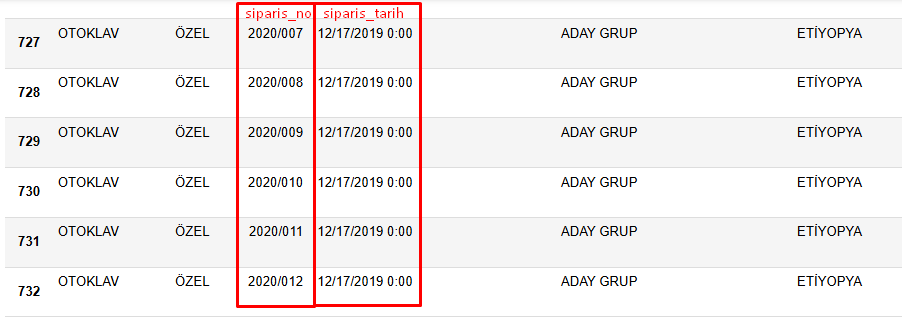
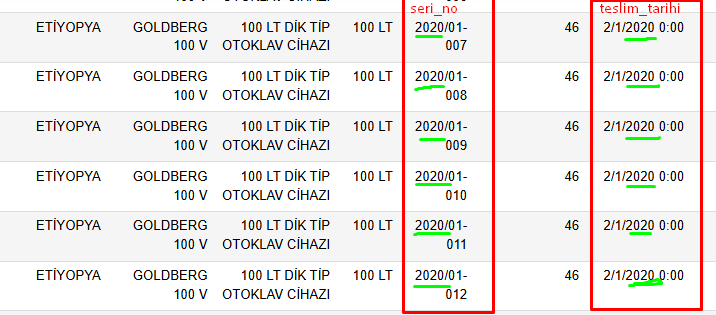

In [34]:
# 'kategori' sütunu 'OTOKLAV' olan ve 'siparis_tarihi' sütununda '2020' içeren satırları filtreleme
df_filtered[
            (df_filtered['kategori'] == 'OTOKLAV')
            & df_filtered['siparis_no'].str.contains('2020', na=False, case=False)
           ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
721,OTOKLAV,ÖZEL,2020/001,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-001,46,2/1/2020 0:00,NaN,NaN
722,OTOKLAV,ÖZEL,2020/002,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-002,46,2/1/2020 0:00,NaN,NaN
723,OTOKLAV,ÖZEL,2020/003,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-003,46,2/1/2020 0:00,NaN,NaN
724,OTOKLAV,ÖZEL,2020/004,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-004,46,2/1/2020 0:00,NaN,NaN
725,OTOKLAV,ÖZEL,2020/005,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-005,46,2/1/2020 0:00,NaN,NaN
726,OTOKLAV,ÖZEL,2020/006,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-006,46,2/1/2020 0:00,NaN,NaN
727,OTOKLAV,ÖZEL,2020/007,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-007,46,2/1/2020 0:00,NaN,NaN
728,OTOKLAV,ÖZEL,2020/008,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-008,46,2/1/2020 0:00,NaN,NaN
729,OTOKLAV,ÖZEL,2020/009,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-009,46,2/1/2020 0:00,NaN,NaN
730,OTOKLAV,ÖZEL,2020/010,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-010,46,2/1/2020 0:00,NaN,NaN


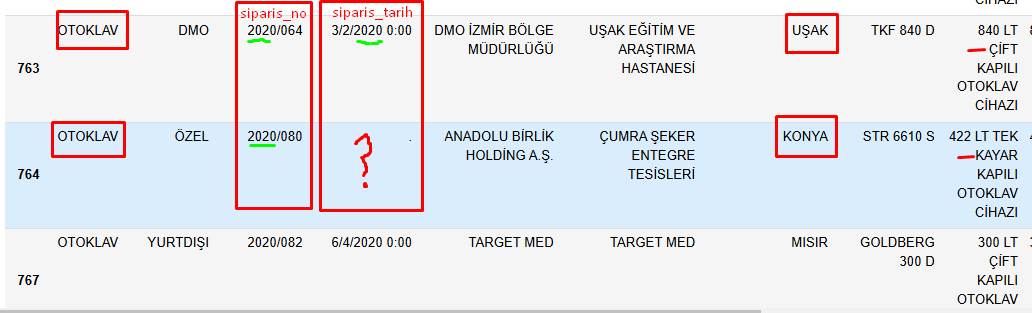
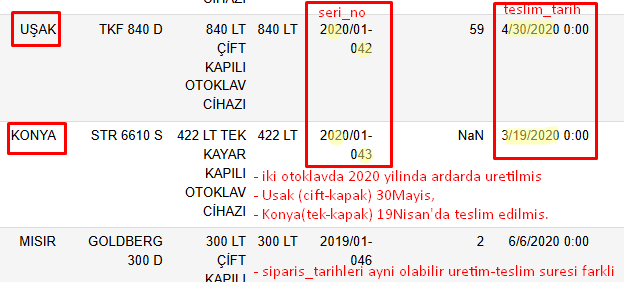

- KONYA 'siparis_tarihi' = '2020-03-02' (USAK siparis_tarihi)

#### Filling the Missing Values:

In [25]:
df_kategori[
            (df_kategori['kategori'] == 'OTOKLAV') &
            (df_kategori['siparis_no'] == '2020/080')
            ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
289,OTOKLAV,ÖZEL,2020/080,NaT,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,2020-03-19,NaN,NaN


In [26]:
# KONYA 'siparis_tarihi' = '2020-03-02' (USAK siparis_tarihi)

# 'kategori' değeri 'OTOKLAV' ve 'siparis_no' değeri '2020/080' olan satırların 'siparis_tarihi' sütununu doldurma
df_kategori.loc[(df_kategori['kategori'] == 'OTOKLAV') &
                (df_kategori['siparis_no'] == '2020/080'),
                'siparis_tarihi'] = '2020-03-02'

# Değişikliği kontrol etmek için
df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['siparis_no'] == '2020/080')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
289,OTOKLAV,ÖZEL,2020/080,2020-03-02,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,2020-03-19,NaN,NaN


In [27]:
df_kategori.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 0 to 1312
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   kategori         1312 non-null   object        
 1   satis_turu       1312 non-null   object        
 2   siparis_no       1312 non-null   object        
 3   siparis_tarihi   1312 non-null   datetime64[ns]
 4   siparisi_veren   1312 non-null   object        
 5   kurulum_yeri     1312 non-null   object        
 6   il               1298 non-null   object        
 7   urun_modeli      1251 non-null   object        
 8   urun_adi         1252 non-null   object        
 9   litre            1244 non-null   object        
 10  seri_no          1246 non-null   object        
 11  teslim_suresi    1090 non-null   object        
 12  teslim_tarihi    1047 non-null   object        
 13  irsaliye_tarihi  6 non-null      object        
 14  uts_no           3 non-null      float64     

In [28]:
# MISSING VALUES in Other Kategories

df_filtered[df_filtered['siparis_tarihi'].isnull()] # ' ' bos string null olark gelmedi

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1728,HIDROJEN PEROKSIT,DMO-YÜKSELİŞ,2018/171,NaN,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MERKEZ EFENDİ DEVLET HASTANESİ,manisa,TKF 120,120 LT ÇİFT KAPI PLAZMA CİHAZI,120 LT,2018/04-004,62 GÜN,NaN,NaN,NaN
31978,REVERSE OSMOS,ÖZEL,NaN,NaN,BEZMİALEM VAKIF ÜNİVERSİTESİ,BEZMİALEM VAKIF ÜNİVERSİTESİ,İSTANBUL,PREMİUM 240,NaN,500 LT,2018/08-001,NaN,NaN,NaN,NaN
31979,REVERSE OSMOS,ÖZEL,NaN,NaN,BÜYÜKÇEKMECE DEVLET HASTANESİ,BÜYÜKÇEKMECE DEVLET HASTANESİ,İSTANBUL,PREMİUM 440,NaN,1000 LT,2018/08-002,NaN,NaN,NaN,NaN
31980,REVERSE OSMOS,NaN,NaN,NaN,FOÇA DEVLET HASTANESİ,FOÇA DEVLET HASTANESİ,İZMİR,PREMİUM 240,NaN,500 LT,2018/08-003,NaN,NaN,NaN,NaN
31981,REVERSE OSMOS,NaN,NaN,NaN,Gemlik Devlet Hastanesi,Gemlik Devlet Hastanesi,bursa,PREMİUM 440,NaN,1000 LT,2018/08-004,NaN,NaN,NaN,NaN
32002,REVERSE OSMOS,NaN,NaN,NaN,ANKARA ÜNİVERSİTESİ,ANKARA ÜNİVERSİTESİ,ANKARA,PREMIUM 340,NaN,750 LT,2019/08-011,NaN,4.01.2020,NaN,NaN
32576,OKSIJEN,YURTDIŞI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# kontrol
df_kategori[df_kategori['siparis_tarihi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### df_filtered (noKartus)

#### ['siparis_no'] == '2018/171']

In [62]:
df_filtered[df_filtered['siparis_no'] == '2018/171']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
512,OTOKLAV,DMO,2018/171,6/12/2018,DMO GENEL MÜDÜRLÜĞÜ,KEÇİÖREN EĞİTİM VE ARAŞTIRMA HASTANESİ,ANKARA,ERS 6613 S,550 LT TEK KALIPI OTOKLAV CİHAZI,550 LT,2018/01-038,54 GÜN,NaN,NaN,NaN
1728,HIDROJEN PEROKSIT,DMO-YÜKSELİŞ,2018/171,NaN,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MERKEZ EFENDİ DEVLET HASTANESİ,manisa,TKF 120,120 LT ÇİFT KAPI PLAZMA CİHAZI,120 LT,2018/04-004,62 GÜN,NaN,NaN,NaN


- Buna dayanarak, **aynı `siparis_no` ve benzer `seri_no`** (2018 ile başlaması) değerlerine sahip olduklarından, DMO-YÜKSELİŞ'te `siparis_tarihi` olarak **6/12/2018** tarihini kullanmak mantıklı olabilir. 
- Bu şekilde, `seri_no` ile de bu tarihin yaklasik doğru olabileceği desteklendi.

In [64]:
# 'siparis_no' değeri '2018/171' olan ve 'siparis_tarihi' boş olan satırlara 6/12/2018 tarihini atama
df_filtered.loc[(df_filtered['siparis_no'] == '2018/171') &
                (df_filtered['siparis_tarihi'].isna()),
                'siparis_tarihi'] = '2018-06-12'

# Değişiklikleri kontrol etmek için
df_filtered[df_filtered['siparis_no'] == '2018/171']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
512,OTOKLAV,DMO,2018/171,6/12/2018,DMO GENEL MÜDÜRLÜĞÜ,KEÇİÖREN EĞİTİM VE ARAŞTIRMA HASTANESİ,ANKARA,ERS 6613 S,550 LT TEK KALIPI OTOKLAV CİHAZI,550 LT,2018/01-038,54 GÜN,NaN,NaN,NaN
1728,HIDROJEN PEROKSIT,DMO-YÜKSELİŞ,2018/171,2018-06-12,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MERKEZ EFENDİ DEVLET HASTANESİ,manisa,TKF 120,120 LT ÇİFT KAPI PLAZMA CİHAZI,120 LT,2018/04-004,62 GÜN,NaN,NaN,NaN


#### AKSARAY (in Kartus)

In [12]:
df_all[df_all['siparis_tarihi'] == 'AKSARAY'] 


# KARTUS daha once uretilmis, stok urun olabilir 
# hatali giris, AKSARAY ==># ALYANS MEDİKAL TİC.LTD. ŞTİ. Ankara'da!!!
# Siparis_no olusturulmus fakat, teslimat'a dair bilgi yok, iptal edilmis olabilir.?????
# Bu satirin ignore edilmesi onerilir

# siparis_no= 2023/02 olan KARTUS ICIN siparis_tarihi = '1/6/2023 0:00' girilmis
# ayni deger girilebilir, fakat hic teslimat bilgisi yok:)

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
18763,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_all[df_all['siparis_tarihi'].str.contains('AKSARAY', na=False, case=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
18763,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_all[df_all['siparis_no'] == '2023/02'] 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
18754,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18755,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18756,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18757,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18758,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18759,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18760,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18761,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18762,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18763,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 'siparis_tarihi' sütununda 'AKSARAY' olan değeri '1/6/2023 0:00' ile değiştirme
df_all.loc[df_all['siparis_tarihi'] == 'AKSARAY', 'siparis_tarihi'] = '1/6/2023 0:00'

# Değişikliği kontrol etmek için
df_all[df_all['siparis_tarihi'].str.contains('AKSARAY', na=False, case=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no


#### DMO (in Hidrojen)

##### NOTE: DMO Nedir Nasil Calisir?
DMO ile sipariş verildiğinde tedarik süreci aşağıdaki adımlar izlenerek gerçekleşir:

1. **Sipariş Oluşturma**: Kamu kurumu, Devlet Malzeme Ofisi’nin çevrim içi platformu veya diğer kanalları aracılığıyla ihtiyacı olan ürün veya hizmetleri sipariş verir. Ürünler, DMO kataloğunda mevcut standartlarla belirlenmiş olanlardan seçilir.

2. **Sipariş Onayı ve Ödeme**: Sipariş verildikten sonra DMO, talebi değerlendirir ve gerekli onayları sağlar. Sipariş onayı ardından ödeme süreci başlatılır. Ödeme genellikle kamu kurumlarıyla yapılan sözleşmelere göre düzenlenir.

3. **Tedarikçi Atama**: DMO, siparişi karşılama yetkisine sahip olan anlaşmalı tedarikçileri devreye alır. Bu aşamada, ürünü hızlı ve kaliteli şekilde tedarik edebilecek en uygun tedarikçi görevlendirilir.

4. **Ürün veya Hizmet Tedarik Süreci**: Tedarikçi, siparişi hazırlayarak belirlenen sürede sevkiyat ve teslimat işlemlerini gerçekleştirir. Teslimat süreleri, ürün stok durumuna ve tedarikçi kapasitesine göre değişebilir.

5. **Teslimat ve Kontrol**: Ürün veya hizmet, sipariş veren kamu kurumuna ulaştığında kalite ve miktar kontrolü yapılır. Herhangi bir eksiklik veya hatalı ürün durumunda DMO ile iletişime geçilerek gerekli düzeltmeler talep edilir.

6. **Faturalandırma ve Kapanış**: Teslim edilen ürünler veya hizmetler için faturalandırma süreci tamamlanır. Bu aşamada DMO ve kamu kurumu arasında işlem sonlandırılır.

Bu süreç, DMO’nun sağladığı hazır altyapı sayesinde ihale sürecine göre daha hızlı ve prosedürsüz bir biçimde gerçekleşir.

In [56]:
df_filtered[df_filtered['siparis_tarihi'] == 'DMO']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1718,HIDROJEN PEROKSIT,DMO,2018/037,DMO,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,BOR DEVLET HASTANESİ,NİĞDE,GP 120,120 LT PLAZMA CİHAZI,120 LT,2018/04-002,50 GÜN,5/14/2018,NaN,NaN


In [57]:
df_all[df_all['siparis_no'] == '2018/037'] # df_all genel dataya bakildi

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1718,HIDROJEN PEROKSIT,DMO,2018/037,DMO,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,BOR DEVLET HASTANESİ,NİĞDE,GP 120,120 LT PLAZMA CİHAZI,120 LT,2018/04-002,50 GÜN,5/14/2018,NaN,NaN,NaN,NaN,NaN
2414,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0562,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2415,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0563,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2416,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0564,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2417,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0565,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2418,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0566,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2419,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0567,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2420,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0568,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2421,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0569,NaN,NaN,NaN,FATURA,NaN,NaN,NaN
2422,KARTUS,NaN,2018/037,4/5/2018,KOCAELİ DEVLET HASTANESİ,NaN,KOCAELİ,NaN,KARTUŞ,NaN,2018/07-0570,NaN,NaN,NaN,FATURA,NaN,NaN,NaN


In [62]:
df_filtered[
            (df_filtered['il'] == 'NİĞDE')
            #& (df_filtered['siparis_no'] == '2018/037')
            ]

# ayni yil icinde NIGDE ye baska siparis yok

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
959,OTOKLAV,DMO,2020/404,10/2/2020 0:00,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,NİĞDE ÖMER HALİSDEMİR ÜNİVERSİTESİ,NİĞDE,ERS 6613 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2020/01-238,64,12/5/2020 0:00,NaN,NaN
1138,OTOKLAV,DMO,2021/293,9/24/2021,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,NİĞDE ÖMER HALİSDEMİR ÜNİVERSİTESİ,NİĞDE,ERS 6613 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2021/01-161,64,11/27/2021 0:00,NaN,NaN
1394,OTOKLAV,İHALE,2022/457,11/9/2022,NİĞDE ÖMER HALİSDEMİR ÜNİVERSİTESİ,NİĞDE EĞİTİM VE ARAŞTIRMA HASTANESİ,NİĞDE,STR 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-163,NaN,11/30/2023,NaN,NaN
1504,OTOKLAV,DMO,2023/116,3/8/2023,DMO MERSİN İRTİBAT BÜROSU,HATAY DEPREM BÖLGESİ DEPO (NİĞDE EĞİTİM VE ARA...,NİĞDE,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2023/01-038,65 GÜN,5/12/2023,NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDE...,NaN
1560,OTOKLAV,DMO,2023/349,10/18/2023,DMO MERSİN İRTİBAT BÜROSU,NİĞDE BOR DEVLET HASTANESİ,NİĞDE,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2023/01-122,65 GÜN,12/22/2023,NaN,NaN
1562,OTOKLAV,DMO,2023/352,10/13/2023,DMO MERSİN İRTİBAT BÜROSU,NİĞDE ÖMER HALİSDEMİR ÜNİVERSİTESİ EĞİTİM VE A...,NİĞDE,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2023/01-131,65 GÜN,12/17/2023,NaN,NaN
1568,OTOKLAV,DMO,2023/433,10/13/2023,DMO MERSİN İRTİBAT BÜROSU,NİĞDE ÖMER HALİSDEMİR ÜNİVERSİTESİ EĞİTİM VE A...,NİĞDE,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2023/01-132,65 GÜN,12/17/2023,NaN,NaN
1718,HIDROJEN PEROKSIT,DMO,2018/037,DMO,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,BOR DEVLET HASTANESİ,NİĞDE,GP 120,120 LT PLAZMA CİHAZI,120 LT,2018/04-002,50 GÜN,5/14/2018,NaN,NaN
1994,REVERSE OSMOS,ÖZEL,2023/112,3.03.2023,FALCON GRUP TIBBİ CİHAZLAR A.Ş.,NİĞDE DEVLET HASTANESİ,NİĞDE,PREMIUM 140,250 LT/SAAT REVERSE OSMOS SU ARTIMA SİSTEMİ,250 LT/SAAT,2023/08-009,14,17.03.2023,NaN,NaN
2220,YIKAMA,DMO,2021/308,9/24/2021,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,NİĞDE ÖMER HALİSDEMİR ÜNİVERSİTESİ,NİĞDE,TSY 360,360 LT ÇİFT KAPILI YIKAMA DEZENFEKSİYON CİHAZI,360 LT,2021/05-054,64,11/27/2021 0:00,NaN,NaN


- df_filtered datasind 1718.index siparis_tarihi 'DMO' olan satirda, 
- teslim_tarihi degerinden teslim_suresi gun olarak cikarip doldurulacak

In [14]:
df_filtered[df_filtered['siparis_tarihi'] == 'DMO']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1718,HIDROJEN PEROKSIT,DMO,2018/037,DMO,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,BOR DEVLET HASTANESİ,NİĞDE,GP 120,120 LT PLAZMA CİHAZI,120 LT,2018/04-002,50 GÜN,5/14/2018,NaN,NaN


In [76]:
utils.df = df_filtered

# Tariher ile ilgili tum hesaplari yapan fonksiyon olsuturuldu call edildi

utils.calculate_date_operation(1718)

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi
Lütfen doldurulacak sütun adını yazınız (örn: 'teslim_tarihi'): siparis_tarihi
İşlem yapılacak başlangıç tarih sütun adını yazınız (örn: 'siparis_tarihi'): teslim_tarihi
Gün sayısını içeren sütun adını yazınız (örn: 'teslim_suresi'): teslim_suresi
Toplama yapmak için '+' yazın, çıkarma yapmak için '-' yazın: -
1718 indeksindeki 'siparis_tarihi' sütunu başarıyla hesaplandı: 2018-03-25 00:00:00


In [32]:
# 'siparis_tarihi' sütununda 'DMO' olan değeri '2018-03-25 00:00:00' ile değiştirme
df_filtered.loc[df_filtered['siparis_tarihi'] == 'DMO', 'siparis_tarihi'] = '2018-03-25 00:00:00'

# Değişikliği kontrol etmek için
df_filtered[df_filtered['siparis_tarihi'] == '2018-03-25 00:00:00']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1718,HIDROJEN PEROKSIT,DMO,2018/037,2018-03-25 00:00:00,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,BOR DEVLET HASTANESİ,NİĞDE,GP 120,120 LT PLAZMA CİHAZI,120 LT,2018/04-002,50 GÜN,5/14/2018,NaN,NaN


### Format Fonk Deneme

In [88]:
# Date formatinda olmasi gereken sutunlari temizler ve standartlastiran utils fonksiyonu
df_otok_o2_copy = df_otok_o2.copy()

# utils.df = df_otok_o2_copy
# df_otok_o2_copy['siparis_tarihi'] = utils.clean_and_standardize_date()

In [89]:
df_otok_o2_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 0 to 1312
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         1312 non-null   object 
 1   satis_turu       1312 non-null   object 
 2   siparis_no       1312 non-null   object 
 3   siparis_tarihi   1312 non-null   object 
 4   siparisi_veren   1312 non-null   object 
 5   kurulum_yeri     1312 non-null   object 
 6   il               1298 non-null   object 
 7   urun_modeli      1251 non-null   object 
 8   urun_adi         1252 non-null   object 
 9   litre            1244 non-null   object 
 10  seri_no          1246 non-null   object 
 11  teslim_suresi    1090 non-null   object 
 12  teslim_tarihi    1047 non-null   object 
 13  irsaliye_tarihi  6 non-null      object 
 14  uts_no           3 non-null      float64
dtypes: float64(1), object(14)
memory usage: 164.0+ KB


In [86]:
import pandas as pd
from dateparser import parse

def clean_and_standardize_date(df, column_name):
    """
    Seçilen sütundaki tarihleri temizleyip standart bir formata (YYYY-MM-DD) dönüştürür.
    Geçersiz tarihleri olduğu gibi bırakır ve en sonda datetime formatına çevirir.
    
    :param df: DataFrame, işlem yapılacak DataFrame
    :param column_name: str, temizlenecek tarih sütununun adı
    :return: DataFrame, temizlenmiş ve standartlaştırılmış tarih sütunu ile
    """
    # Sütunun mevcut olup olmadığını kontrol et
    if column_name not in df.columns:
        print(f"'{column_name}' sütunu mevcut değil.")
        return df

    # Tarih formatlama işlemi
    def standardize_date(date_string):
        if pd.isnull(date_string):  # Boş değerleri korur
            return date_string
        # Tarih olarak parse et ve formatla, tanınmayanları olduğu gibi bırak
        parsed_date = parse(date_string)
        if parsed_date:
            return parsed_date.strftime("%Y-%m-%d")
        else:
            return date_string  # Tanınmayanları olduğu gibi döndür

    # Sütundaki her bir tarihi temizleme ve formatlama
    df[column_name] = df[column_name].apply(standardize_date)

    # Sütunu datetime formatına çevirme, hatalıları NaT olarak işaretleme
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

    print(f"'{column_name}' sütunundaki tarihler temizlenmiş, standart hale getirilmiş ve datetime formatına dönüştürülmüştür.")
    return df

In [90]:
# Fonksiyonu kullanma
df_otok_o2_copy = clean_and_standardize_date(df_otok_o2_copy, 'siparis_tarihi')
df_otok_o2_copy.head(2)

'siparis_tarihi' sütunundaki tarihler temizlenmiş, standart hale getirilmiş ve datetime formatına dönüştürülmüştür.


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30,NaN,NaN,NaN
1,OTOKLAV,DMO,2018/072,2017-12-28,DMO GENEL MÜDÜRLÜK,T.C. GIDA TARIM VE HAYV. BAKANLIĞI GIDA VE KON...,ANKARA,7717 S,2000 LT ÇİFT KAPILI LABARATUVAR TİP BUHAR STER...,2000 LİTRE,2018/01-002,100 GÜN,2018-06-22,NaN,NaN


In [91]:
df_otok_o2_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 0 to 1312
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   kategori         1312 non-null   object        
 1   satis_turu       1312 non-null   object        
 2   siparis_no       1312 non-null   object        
 3   siparis_tarihi   1312 non-null   datetime64[ns]
 4   siparisi_veren   1312 non-null   object        
 5   kurulum_yeri     1312 non-null   object        
 6   il               1298 non-null   object        
 7   urun_modeli      1251 non-null   object        
 8   urun_adi         1252 non-null   object        
 9   litre            1244 non-null   object        
 10  seri_no          1246 non-null   object        
 11  teslim_suresi    1090 non-null   object        
 12  teslim_tarihi    1047 non-null   object        
 13  irsaliye_tarihi  6 non-null      object        
 14  uts_no           3 non-null      float64     

In [92]:
df_otok_o2_copy[df_otok_o2_copy['siparis_tarihi'].isnull()]

# OTOKLAV VE OKSIJEN  Datasetinde 'siparis_tarihi' sutununda NULL deger kalmamistir.

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


In [93]:
utils.df = df_otok_o2_copy
utils.find_non_numeric_values()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: siparis_tarihi
'siparis_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', '-'}

In [94]:
df_otok_o2_copy['siparis_tarihi'].isna().sum()

0

## **teslim_suresi**

### Anomalies:

In [42]:
utils.df = df_kategori

utils.get_value_count()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: teslim_suresi


,teslim_suresi,counts,percent
0,65 GÜN,165,15.14%
1,35,66,6.06%
2,64,59,5.41%
3,60 GÜN,46,4.22%
4,40,43,3.94%
5,38,35,3.21%
6,59,33,3.03%
7,30 GÜN,31,2.84%
8,20,29,2.66%
9,46,28,2.57%


##### Gun yerine tarih girilen degerler:

- Teslim_suresi sutununa girilen TArihler --> Teslim_tarihi sutununa aktarildi,
    - teslim_tarihi zaten var ise NaN olarak degistirildi

In [33]:
df_kategori[df_kategori['teslim_suresi'] == '5/27/2018 0:00'] 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
22,OTOKLAV,DMO,2018/104,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-023,5/27/2018 0:00,NaN,NaN,NaN
23,OTOKLAV,DMO,2018/213,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-024,5/27/2018 0:00,NaN,NaN,NaN


In [34]:
# DIKKAT: teslim_suresi sutununa girilen tarihler --> teslim_tarihi sutununa aktar!

df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['siparis_tarihi'] == '2018-04-03')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
22,OTOKLAV,DMO,2018/104,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-023,5/27/2018 0:00,NaN,NaN,NaN
23,OTOKLAV,DMO,2018/213,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-024,5/27/2018 0:00,NaN,NaN,NaN


In [35]:
# teslim_suresi sutununa girilen tarihler --> teslim_tarihi sutununa aktarildi (yyyy-mm-dd formatinda)

df_kategori.loc[(df_kategori['kategori'] == 'OTOKLAV') &
                (df_kategori['siparis_tarihi'] == '2018-04-03'),
                'teslim_tarihi'] = '2018-05-27'

# Değişikliği kontrol etmek için
df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['siparis_tarihi'] == '2018-04-03')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
22,OTOKLAV,DMO,2018/104,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-023,5/27/2018 0:00,2018-05-27,NaN,NaN
23,OTOKLAV,DMO,2018/213,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-024,5/27/2018 0:00,2018-05-27,NaN,NaN


In [36]:
# Iptal-1 - teslim_tarihi var zaten
# teslim_suresine tarih yanlis girilmis, NaN ile degistir

df_kategori[(df_kategori['teslim_suresi'] == '6/15/2018 0:00')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
25,OTOKLAV,DMO,2018/062,2018-04-27,DMO BURSA BÖLGE MÜDÜRLÜĞÜ,BURHANİYE DEVLET HASTANESİ,BALIKESİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-026,6/15/2018 0:00,2018-05-07,NaN,NaN


In [37]:
# Iptal-2
# teslim_suresine tarih yanlis girilmis, NaN ile degistir

df_kategori[(df_kategori['teslim_suresi'] == '5/9/2018 0:00')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
24,OTOKLAV,YURTDIŞI,2018/058,2018-04-20,GÜRCİSTAN,PRİME,GÜRCİSTAN,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2018/01-025,5/9/2018 0:00,2018-05-07,NaN,NaN


In [38]:
# Iptal-3
# teslim_suresine tarih yanlis girilmis, NaN ile degistir

df_kategori[(df_kategori['teslim_suresi'] == '1/30/1900 0:00')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
17,OTOKLAV,ÖZEL,2018/122,2018-03-12,İSTANBUL AYDIN ÜNİVERSİTESİ,İSTANBUL AYDIN ÜNİVERSİTESİ,İSTANBUL,STR 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LT,2018/01-018,1/30/1900 0:00,2018-04-06,NaN,NaN


In [39]:
# Yukarida verilen iptal edilen hatali teslim suresi degerleri NaN ile isaretlendi.

# 'teslim_suresi' sütununda '5/27/2018 0:00' değerini NaN ile değiştirme
df_kategori.loc[df_kategori['teslim_suresi'] == '5/27/2018 0:00', 'teslim_suresi'] = None

# 'teslim_suresi' sütununda '6/15/2018 0:00' değerini NaN ile değiştirme
df_kategori.loc[df_kategori['teslim_suresi'] == '6/15/2018 0:00', 'teslim_suresi'] = None

# 'teslim_suresi' sütununda '5/9/2018 0:00' değerini NaN ile değiştirme
df_kategori.loc[df_kategori['teslim_suresi'] == '5/9/2018 0:00', 'teslim_suresi'] = None

# 'teslim_suresi' sütununda '1/30/1900 0:00' değerini NaN ile değiştirme
df_kategori.loc[df_kategori['teslim_suresi'] == '1/30/1900 0:00', 'teslim_suresi'] = None

In [40]:
#kontrol
df_kategori[df_kategori['teslim_suresi'].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
17,OTOKLAV,ÖZEL,2018/122,2018-03-12,İSTANBUL AYDIN ÜNİVERSİTESİ,İSTANBUL AYDIN ÜNİVERSİTESİ,İSTANBUL,STR 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LT,2018/01-018,None,2018-04-06,NaN,NaN
22,OTOKLAV,DMO,2018/104,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-023,None,2018-05-27,NaN,NaN
23,OTOKLAV,DMO,2018/213,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-024,None,2018-05-27,NaN,NaN
24,OTOKLAV,YURTDIŞI,2018/058,2018-04-20,GÜRCİSTAN,PRİME,GÜRCİSTAN,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2018/01-025,None,2018-05-07,NaN,NaN
25,OTOKLAV,DMO,2018/062,2018-04-27,DMO BURSA BÖLGE MÜDÜRLÜĞÜ,BURHANİYE DEVLET HASTANESİ,BALIKESİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-026,None,2018-05-07,NaN,NaN
276,OTOKLAV,YURTDIŞI,2020/050,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-031,NaN,DERHAL,NaN,NaN
277,OTOKLAV,YURTDIŞI,2020/051,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-032,NaN,DERHAL,NaN,NaN
289,OTOKLAV,ÖZEL,2020/080,2020-03-02,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,2020-03-19,NaN,NaN
291,OTOKLAV,YURTDIŞI,2019/241,2020-03-17,ZARMED HOSPİTAL,ZARMED HOSPİTAL,ÖZBEKİSTAN,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKLAV CİHAZI,250 LT,2020/01-045,NaN,11..04.2020,NaN,NaN
293,OTOKLAV,YURTDIŞI,2019/174,2020-03-17,ZARMED HOSPİTAL,ZARMED HOSPİTAL,ÖZBEKİSTAN,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-046,NaN,11..04.2020,NaN,NaN


###### Sembol-Kelime temizleme

In [41]:
utils.df = df_kategori 

# teslim_suresi
utils.find_non_numeric_values()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_suresi
'teslim_suresi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ) ',
 ' -',
 ' GÜN ',
 ' GÜN  ',
 ' GÜN   ',
 ' GÜN DERHAL ',
 ' GÜN SERİ NUMARASI İPTAL OLDU ',
 ' HAFTA ',
 ' HAFTA  ',
 ' gün',
 ' gün ',
 'GÜN '}

In [42]:
utils.get_value_count()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: teslim_suresi 


,teslim_suresi,counts,percent
0,65 GÜN,165,15.21%
1,35,66,6.08%
2,64,59,5.44%
3,60 GÜN,46,4.24%
4,40,43,3.96%
5,38,35,3.23%
6,59,33,3.04%
7,30 GÜN,31,2.86%
8,20,29,2.67%
9,46,28,2.58%


In [43]:
# HATALI GIRIS-1 
df_kategori[df_kategori['teslim_suresi']== '-44097']

# BAGIS edilen urun-teslimat bilgisi yok

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
401,OTOKLAV,BAĞIŞ,2019/321,2020-09-23,HİKMET GÖKÇE,TOSYA DEVLET HASTANESİ,KASTAMONU,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-155,-44097,NaN,NaN,NaN


In [44]:
# HATALI GIRIS-2
df_kategori[df_kategori['teslim_suresi']== '-44105']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
405,OTOKLAV,ÖZEL,2019/262,2020-10-01,MERSİN SU HASTANESİ,MERSU ÖZEL SAĞLIK HİZMETLERİ TİC.LTD.ŞTİ.,MERSİN,STR 75 V,75 LT VAKUMLU DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-159,-44105,NaN,NaN,NaN


In [95]:
# - NaN ile degistirildi
df_kategori.loc[df_kategori['teslim_suresi'] == '-44097', 'teslim_suresi'] = pd.NA
df_kategori.loc[df_kategori['teslim_suresi'] == '-44105', 'teslim_suresi'] = pd.NA

- BAGIS edilen urun-teslimat bilgisi yok
- Negatif ve -44105 / -44097 gibi teslimat suresi gun degerleri olamaz -HATALI GIRIS
- NaN ile degistirildi

In [46]:
#(ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ)

df_kategori[df_kategori['teslim_suresi'].str.contains(r'\(ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI', na=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
719,OTOKLAV,ÖZEL,2022/015,2022-01-06,MDR BİYOTEKNOLOJİ,MDR BİYOTEKNOLOJİ,MDR BİYOTEKNOLOJİ,ES 100,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2023/01-001,(ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SER...,NaN,NaN,NaN


In [47]:
df_kategori[df_kategori['kurulum_yeri'].str.contains(r'\ALYANS', na=False)] # ALYANS MEDİKAL kontrol edildi

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


In [48]:
df_kategori[df_kategori['siparisi_veren']== 'MDR BİYOTEKNOLOJİ'] # MDR BİYOTEKNOLOJİ => Ankara'da

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
719,OTOKLAV,ÖZEL,2022/015,2022-01-06,MDR BİYOTEKNOLOJİ,MDR BİYOTEKNOLOJİ,MDR BİYOTEKNOLOJİ,ES 100,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2023/01-001,(ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SER...,NaN,NaN,NaN


In [49]:
df_kategori[df_kategori['seri_no']== '2023/01-001'] # ALYANS MEDİKAL seri_no ayni olan urunler kontrol edildi

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
719,OTOKLAV,ÖZEL,2022/015,2022-01-06,MDR BİYOTEKNOLOJİ,MDR BİYOTEKNOLOJİ,MDR BİYOTEKNOLOJİ,ES 100,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2023/01-001,(ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SER...,NaN,NaN,NaN
1007,OTOKLAV,DMO,2023/012,2022-12-26,DMO ESKİŞEHİR BÖLGE MÜDÜRLÜĞÜ,MEHMET AKİF ERSOY ÜNİVERSİTESİ İDARİ VE MALİ İ...,BURDUR,GOLDBERG 550 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2023/01-001,60 GÜN,2023-02-24,NaN,NaN


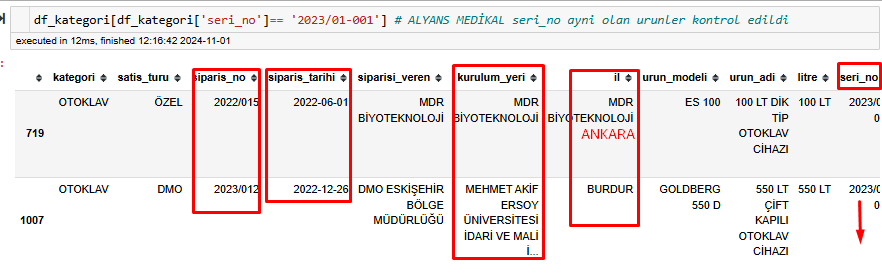
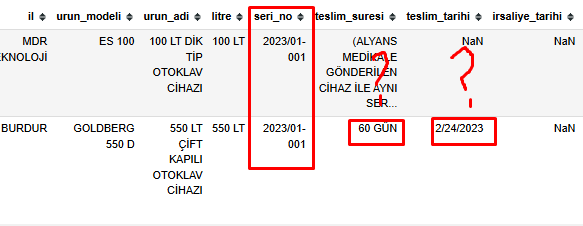

- ['teslim_suresi'] == (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ)
- ['seri_no']== '2023/01-001' olan 2 cihaz var
    - Farkli yillarda siparis edilmis, Fakat AYNI ZMANADA URETILMIS ve de teslim edilmis olabilir?
    - Uretimden sonra ayni surede teslim edildi ise 719.index MDR teslim suresi;
    - -> MDR siparis_tarihi - BURDUR teslim_tarihi ===> 1 Haz 2022 - 2 Subat 2023 = 246 days olabilir

In [96]:
# ['teslim_suresi'] == (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ)

# NaN ile degistirme;
#df_kategori.loc[df_kategori['siparisi_veren'] == 'MDR BİYOTEKNOLOJİ', 'teslim_suresi'] = pd.NA

# 246 gun sayisi girme;
df_kategori.loc[df_kategori['siparisi_veren'] == 'MDR BİYOTEKNOLOJİ', 'teslim_suresi'] = 246

- ['teslim_suresi'] == (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ)

    - teslim_suresi BURDUR teslim_tarihi ile ayni olabilir
    - NaN ile degistirilebilirdi
    - 246 gun ile dolduruldu

In [97]:
# ['teslim_suresi']== 'SERİ NUMARASI İPTAL OLDU'

df_kategori[df_kategori['teslim_suresi']== 'SERİ NUMARASI İPTAL OLDU']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


In [52]:
#- IGNORE EDILDI
# 2024 YILINA AKTARILDI 

df_kategori = df_kategori[df_kategori['teslim_suresi'] != 'SERİ NUMARASI İPTAL OLDU']

- ['teslim_suresi']== 'SERİ NUMARASI İPTAL OLDU'
- 2024 YILINA AKTARILDI ifadesi var, 
    - Bu satir ignore edildi

In [98]:
# ['teslim_suresi']== 'DERHAL' ; 2 adet satir var

df_kategori[df_kategori['teslim_suresi']== 'DERHAL']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


In [99]:
# 21. index: ['teslim_suresi']== 'DERHAL'

df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['kurulum_yeri'] == 'ÖZEL SAFA TESHİS VE TEDAVİ MERKEZİ')
         & (df_kategori['teslim_suresi'] == 'DERHAL')
          ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


['teslim_suresi'] == 'DERHAL'

- 11 Nisan 2018 siparis verilmis - 27 Nisan 2018 teslim edilmis GORULUYOR
- teslim_suresi = 16 gun olacak


In [103]:
# 21. index: ['teslim_suresi']== 'DERHAL' ==> 16 GUN ile degistirildi

df_kategori.loc[
    (df_kategori['kategori'] == 'OTOKLAV') & 
    (df_kategori['kurulum_yeri'] == 'ÖZEL SAFA TESHİS VE TEDAVİ MERKEZİ'),
    'teslim_suresi'] = 16


#kontrol
df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['kurulum_yeri'] == 'ÖZEL SAFA TESHİS VE TEDAVİ MERKEZİ')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
21,OTOKLAV,ÖZEL,2018/060,2018-04-11,ÖZEL SAFA TESHİS VE TEDAVİ MERKEZİ,ÖZEL SAFA TESHİS VE TEDAVİ MERKEZİ,İZMİR,TKF 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-022,16.0,2018-04-27,NaN,NaN


In [104]:
# 64. index: ['teslim_suresi']== 'DERHAL'

df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['kurulum_yeri'] == 'MODERN MEDİCAL')
          ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
64,OTOKLAV,YURTDIŞI,2018/120,2018-07-25,MODERN MEDİCAL,MODERN MEDİCAL,IRAK,GOLDBERG 550 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2018/01-066,NaN,NaN,NaN,NaN
296,OTOKLAV,YURTDIŞI,2020/088,2020-03-18,MODERN MEDİCAL,MODERN MEDİCAL,IRAK,GOLDBERG 120 S,120 LT TEK KAPILI OTOKLAV CİHAZI,120 LT,2020/01-049,2.0,2020-03-20,NaN,NaN
297,OTOKLAV,YURTDIŞI,2019/215,2020-03-18,MODERN MEDİCAL,MODERN MEDİCAL,IRAK,GOLDBERG 200 S,200 LT TEK KAPILI OTOKLAV CİHAZI,200 LT,2020/01-050,2.0,2020-03-20,NaN,NaN


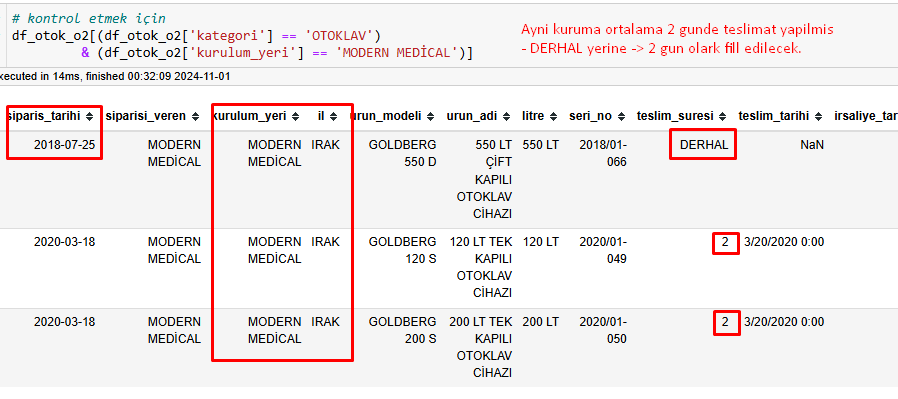

In [106]:
# 64.index 'teslim_suresi' sütununda 'DERHAL' değerini 2 ile değiştirme
df_kategori.loc[(df_kategori['kategori'] == 'OTOKLAV') 
               & (df_kategori['kurulum_yeri'] == 'MODERN MEDİCAL'), 'teslim_suresi'] = 2

# kontrol etmek için
df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['kurulum_yeri'] == 'MODERN MEDİCAL')
          ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
64,OTOKLAV,YURTDIŞI,2018/120,2018-07-25,MODERN MEDİCAL,MODERN MEDİCAL,IRAK,GOLDBERG 550 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2018/01-066,2.0,NaN,NaN,NaN
296,OTOKLAV,YURTDIŞI,2020/088,2020-03-18,MODERN MEDİCAL,MODERN MEDİCAL,IRAK,GOLDBERG 120 S,120 LT TEK KAPILI OTOKLAV CİHAZI,120 LT,2020/01-049,2.0,2020-03-20,NaN,NaN
297,OTOKLAV,YURTDIŞI,2019/215,2020-03-18,MODERN MEDİCAL,MODERN MEDİCAL,IRAK,GOLDBERG 200 S,200 LT TEK KAPILI OTOKLAV CİHAZI,200 LT,2020/01-050,2.0,2020-03-20,NaN,NaN


In [61]:
utils.df = df_kategori

utils.get_value_count()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: teslim_suresi


,teslim_suresi,counts,percent
0,65 GÜN,165,15.25%
1,35,66,6.10%
2,64,59,5.45%
3,60 GÜN,46,4.25%
4,40,43,3.97%
5,38,35,3.23%
6,59,33,3.05%
7,30 GÜN,31,2.87%
8,20,29,2.68%
9,46,28,2.59%


In [62]:
# Kalan Anomalilerin Tespit edilmesi

utils.find_non_numeric_values() #Sütun adı: teslim_suresi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_suresi
'teslim_suresi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' -',
 ' GÜN ',
 ' GÜN  ',
 ' GÜN   ',
 ' HAFTA ',
 ' HAFTA  ',
 ' gün',
 ' gün ',
 'GÜN '}

In [ ]:
# 'GÜN' ve 'gün' ifadelerini temizleme
df_kategori['teslim_suresi'] = df_kategori['teslim_suresi'].str.replace(r'\s*[Gg]ün\s*', '', regex=True)

# '3 HAFTA' gibi ifadeleri gün sayısına çevirme (her hafta 7 gün olarak hesaplanır)
df_kategori.loc[df_kategori['teslim_suresi'].str.contains('HAFTA', case=False, na=False), 'teslim_suresi'] = \
    df_kategori['teslim_suresi'].str.extract(r'(\d+)').astype(float) * 7


# Gereksiz karakterleri kaldırma ve negatif sayıları pozitif yapma
df_kategori['teslim_suresi'] = df_kategori['teslim_suresi'].astype(str).str.replace(r'[^\d-]', '', regex=True)

# Sayısal değerlere çevrilmiş hali
df_kategori['teslim_suresi'] = pd.to_numeric(df_kategori['teslim_suresi'], errors='coerce')

# Negatif sayılardaki '-' işaretini kaldırma
df_kategori['teslim_suresi'] = df_kategori['teslim_suresi'].apply(lambda x: abs(pd.to_numeric(x, errors='coerce')) if pd.to_numeric(x, errors='coerce') is not None else x)


In [66]:
# Anomali kontrol

utils.find_non_numeric_values() #Sütun adı: teslim_suresi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_suresi
'teslim_suresi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', '.'}

In [75]:
# Geçersiz değerleri NaN olarak ayarlama ve sütunu integer olarak ayarlama
df_kategori['teslim_suresi'] = df_kategori['teslim_suresi'].replace({' ': np.nan, '.': np.nan}).astype('Int64')

# Sütundaki boşlukları temizleyip tamamen boş olan hücreleri NaN yapma
df_kategori['teslim_suresi'] = df_kategori['teslim_suresi'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_kategori['teslim_suresi'] = df_kategori['teslim_suresi'].replace('', np.nan)

float64


In [108]:
df_kategori.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1310 entries, 0 to 1312
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   kategori         1310 non-null   object        
 1   satis_turu       1310 non-null   object        
 2   siparis_no       1310 non-null   object        
 3   siparis_tarihi   1310 non-null   datetime64[ns]
 4   siparisi_veren   1310 non-null   object        
 5   kurulum_yeri     1310 non-null   object        
 6   il               1297 non-null   object        
 7   urun_modeli      1250 non-null   object        
 8   urun_adi         1250 non-null   object        
 9   litre            1242 non-null   object        
 10  seri_no          1244 non-null   object        
 11  teslim_suresi    1079 non-null   float64       
 12  teslim_tarihi    1048 non-null   object        
 13  irsaliye_tarihi  6 non-null      object        
 14  uts_no           3 non-null      float64     

### Missings:

In [79]:
utils.missing_values()

# seri_no null degerler doldurulmayacak hepsi unique

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
kategori,0,0.00%
satis_turu,0,0.00%
siparis_no,0,0.00%
siparis_tarihi,0,0.00%
siparisi_veren,0,0.00%
kurulum_yeri,0,0.00%
il,13,0.99%
urun_modeli,60,4.58%
urun_adi,60,4.58%
litre,68,5.19%


In [109]:
df_kategori[df_kategori['teslim_suresi'].isna()] 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
17,OTOKLAV,ÖZEL,2018/122,2018-03-12,İSTANBUL AYDIN ÜNİVERSİTESİ,İSTANBUL AYDIN ÜNİVERSİTESİ,İSTANBUL,STR 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LT,2018/01-018,NaN,2018-04-06,NaN,NaN
22,OTOKLAV,DMO,2018/104,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-023,NaN,2018-05-27,NaN,NaN
23,OTOKLAV,DMO,2018/213,2018-04-03,DMO GAZİANTEP BÖLGE MÜDÜRLÜĞÜ,İSKENDERUN ADSM,İSKENDERUN,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-024,NaN,2018-05-27,NaN,NaN
24,OTOKLAV,YURTDIŞI,2018/058,2018-04-20,GÜRCİSTAN,PRİME,GÜRCİSTAN,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2018/01-025,NaN,2018-05-07,NaN,NaN
25,OTOKLAV,DMO,2018/062,2018-04-27,DMO BURSA BÖLGE MÜDÜRLÜĞÜ,BURHANİYE DEVLET HASTANESİ,BALIKESİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-026,NaN,2018-05-07,NaN,NaN
118,OTOKLAV,YURTDIŞI,2018/293,2018-09-19,RAWAAT-ALMAJARRA COMPANY,RAWAAT-ALMAJARRA COMPANY,IRAK,STR 5510 D,250 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,250 LT,2018/01-120,NaN,NaN,NaN,NaN
276,OTOKLAV,YURTDIŞI,2020/050,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-031,NaN,DERHAL,NaN,NaN
277,OTOKLAV,YURTDIŞI,2020/051,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-032,NaN,DERHAL,NaN,NaN
289,OTOKLAV,ÖZEL,2020/080,2020-03-02,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,2020-03-19,NaN,NaN
291,OTOKLAV,YURTDIŞI,2019/241,2020-03-17,ZARMED HOSPİTAL,ZARMED HOSPİTAL,ÖZBEKİSTAN,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKLAV CİHAZI,250 LT,2020/01-045,NaN,11..04.2020,NaN,NaN


In [82]:
df_kategori[df_kategori['urun_modeli'] == 'GOLDBERG 840 D-REVİZYON']

# 704 ignore edilecek duplicates data

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
529,OTOKLAV,YURTDIŞI,2021/020,2022-04-13,KONGO,KONGO,KONGO,GOLDBERG 840 D-REVİZYON,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-036,21.0,2022-05-04,NaN,NaN
704,OTOKLAV,YURTDIŞI,2021/020,2022-04-13,KONGO,KONGO,KONGO,GOLDBERG 840 D-REVİZYON,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-036,NaN,2022-05-04,NaN,NaN


In [85]:
# Index 704 olan satırı drop edildi

df_kategori = df_kategori.drop(704)

In [86]:
df_kategori[df_kategori['urun_modeli'] == 'GOLDBERG 840 D-REVİZYON']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
529,OTOKLAV,YURTDIŞI,2021/020,2022-04-13,KONGO,KONGO,KONGO,GOLDBERG 840 D-REVİZYON,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-036,21.0,2022-05-04,NaN,NaN


## **teslim_tarihi**

Ürünün teslim edildiği gerçek tarih olarak tanımlanır. Siparişin tamamlandığı ve ürünün müşteriye ulaştırıldığı gün olarak kaydedilir. Bu tarih, siparişin tamamlanma sürecinin son noktasıdır ve siparis_tarihi ve teslim_suresi ile birlikte değerlendirildiğinde, siparişin zamanında veya geç teslim edilip edilmediği anlaşılabilir.

In [128]:
utils.df = df_kategori

utils.get_value_count()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: teslim_tarihi


,teslim_tarihi,counts,percent
0,2020-07-14,42,4.01%
1,2022-12-20,35,3.34%
2,2021-04-20,34,3.24%
3,2020-02-01,25,2.39%
4,2024-02-20,22,2.10%
5,2021-08-20,12,1.15%
6,2022-12-23,10,0.95%
7,2023-04-25,10,0.95%
8,2024-04-15,9,0.86%
9,2022-09-30,9,0.86%


In [ ]:
#orjinal tarihler

df_kategori['teslim_tarihi'].unique()

### Anomalies

In [130]:
utils.find_non_numeric_values() #teslim_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_tarihi
'teslim_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', ' DERHAL ', ' DERHAL DERHAL ', '-', '.', '..'}

In [132]:
# ['teslim_tarihi']== 'DERHAL' ; 3 adet satir var

df_kategori[df_kategori['teslim_tarihi'].str.contains('DERHAL', na=False, case=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
276,OTOKLAV,YURTDIŞI,2020/050,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-031,NaN,DERHAL,NaN,NaN
277,OTOKLAV,YURTDIŞI,2020/051,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-032,NaN,DERHAL,NaN,NaN
366,OTOKLAV,DMO,2019/330,2020-06-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,İZMİT SEKA DEVLET HASTANESİ,İZMİT,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2020/01-119,NaN,DERHAL,NaN,NaN


In [135]:
# PAKİSTAN'a gonderilen DERHAL teslim_tarihi 

df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['il'] == 'PAKİSTAN')
          ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
276,OTOKLAV,YURTDIŞI,2020/050,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-031,NaN,DERHAL,NaN,NaN
277,OTOKLAV,YURTDIŞI,2020/051,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-032,NaN,DERHAL,NaN,NaN
622,OTOKLAV,YURTDIŞI,2021/060,2021-06-17,AMAX INTERNATİONAL,AMAX INTERNATİONAL,PAKİSTAN,GOLDBERG 550 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2021/01-053,9.0,2021-06-26,NaN,NaN
624,OTOKLAV,YURTDIŞI,2021/184,2021-06-02,AMAX INTERNATİONAL,AMAX INTERNATİONAL,PAKİSTAN,GOLDBERG 160 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LT,2021/01-131,24.0,2021-06-26,NaN,NaN
625,OTOKLAV,YURTDIŞI,2021/185,2021-06-02,AMAX INTERNATİONAL,AMAX INTERNATİONAL,PAKİSTAN,GOLDBERG 160 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LT,2021/01-132,24.0,2021-06-26,NaN,NaN
632,OTOKLAV,YURTDIŞI,2021/180,2021-06-17,AMAX INTERNATİONAL,AMAX INTERNATİONAL,PAKİSTAN,GOLDBERG 550 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2021/01-052,9.0,2021-06-26,NaN,NaN
1104,OTOKLAV,YURTDIŞI,2023/360,2024-02-14,IEC,PAKİSTAN,PAKİSTAN,GOLDBERG 675,675 LT ÇİFT KAPILI OTOKLAV CİHAZI,675 LT,2024/01-026,40.0,2024-02-20,NaN,NaN
1105,OTOKLAV,YURTDIŞI,2023/361,2024-02-14,IEC,PAKİSTAN,PAKİSTAN,GOLDBERG 675,675 LT ÇİFT KAPILI OTOKLAV CİHAZI,675 LT,2024/01-027,40.0,2024-02-20,NaN,NaN
1106,OTOKLAV,YURTDIŞI,2023/362,2024-02-14,IEC,PAKİSTAN,PAKİSTAN,GOLDBERG 675,675 LT ÇİFT KAPILI OTOKLAV CİHAZI,675 LT,2024/01-028,40.0,2024-02-20,NaN,NaN
1107,OTOKLAV,YURTDIŞI,2023/363,2024-02-14,IEC,PAKİSTAN,PAKİSTAN,GOLDBERG 675,675 LT ÇİFT KAPILI OTOKLAV CİHAZI,675 LT,2024/01-029,40.0,2024-02-20,NaN,NaN


- PAKİSTAN'a benzer urunler DERHAL/en erken 9 gunde teslim edilmis. 
- PAKİSTAN'a gonderilen DERHAL teslim_suresi = 9 gun olarak girildi

In [139]:
# DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ'ne gonderilen DERHAL teslim_tarihi 

df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['siparisi_veren'] == 'DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ')
          ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
4,OTOKLAV,DMO,2018/107,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-005,20.0,NaN,NaN,NaN
5,OTOKLAV,DMO,2018/069,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-006,20.0,NaN,NaN,NaN
7,OTOKLAV,DMO,2018/070,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-008,20.0,2018-06-22,NaN,NaN
8,OTOKLAV,DMO,2018/105,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-009,20.0,NaN,NaN,NaN
9,OTOKLAV,DMO,2018/067,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-010,20.0,NaN,NaN,NaN
26,OTOKLAV,DMO,2018/083,2018-05-03,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,BÜYÜKÇEKMECE DEVLET HASTANESİ,İSTANBUL,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-027,55.0,2018-06-26,NaN,NaN
27,OTOKLAV,DMO,2018/106,2018-05-03,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,BÜYÜKÇEKMECE DEVLET HASTANESİ,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-028,55.0,2018-06-22,NaN,NaN
28,OTOKLAV,DMO,2018/066,2018-05-04,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,BÜYÜKÇEKMECE DEVLET HASTANESİ,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-029,56.0,2018-04-21,NaN,NaN
29,OTOKLAV,DMO,2018/153,2018-05-04,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,İPSALA DEVLET HASTANESİ,EDİRNE,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-030,50.0,2018-09-13,NaN,NaN
56,OTOKLAV,DMO,2018/205,2018-07-06,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,OKMEYDANI ADSM,İSTANBUL,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-058,50.0,2018-08-11,NaN,NaN


In [141]:
df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['urun_adi'] == '840 LT ÇİFT KAPILI OTOKLAV CİHAZI')
          ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
15,OTOKLAV,DMO,2018/073,2018-03-03,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ ATATÜRK EĞİTİM...,İZMİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-016,55.0,NaN,NaN,NaN
21,OTOKLAV,ÖZEL,2018/060,2018-04-11,ÖZEL SAFA TESHİS VE TEDAVİ MERKEZİ,ÖZEL SAFA TESHİS VE TEDAVİ MERKEZİ,İZMİR,TKF 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-022,16.0,2018-04-27,NaN,NaN
25,OTOKLAV,DMO,2018/062,2018-04-27,DMO BURSA BÖLGE MÜDÜRLÜĞÜ,BURHANİYE DEVLET HASTANESİ,BALIKESİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-026,NaN,2018-05-07,NaN,NaN
30,OTOKLAV,DMO,2018/056,2018-05-08,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-031,50.0,NaN,NaN,NaN
31,OTOKLAV,DMO,2018/061,2018-05-08,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-032,50.0,NaN,NaN,NaN
33,OTOKLAV,DMO,2018/157,2018-05-09,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,ÇEŞME DEVLET HASTANESİ,İZMİR,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-034,50.0,2018-08-05,NaN,NaN
46,OTOKLAV,DMO,2018/179,2018-06-18,DMO BURSA BÖLGE MÜDÜRLÜĞÜ,BANDIRMA DEVLET HASTANESİ,BALIKESİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-047,35.0,2018-06-27,NaN,NaN
47,OTOKLAV,DMO,2018/180,2018-06-18,DMO BURSA BÖLGE MÜDÜRLÜĞÜ,BANDIRMA DEVLET HASTANESİ,BALIKESİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-048,55.0,2018-05-31,NaN,NaN
48,OTOKLAV,DMO,2018/181,2018-06-18,DMO BURSA BÖLGE MÜDÜRLÜĞÜ,BANDIRMA DEVLET HASTANESİ,BALIKESİR,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-049,55.0,2018-06-22,NaN,NaN
56,OTOKLAV,DMO,2018/205,2018-07-06,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,OKMEYDANI ADSM,İSTANBUL,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-058,50.0,2018-08-11,NaN,NaN


- DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ tarafindan yapilan siparislerden;
- urun_ad = 840 LT ÇİFT KAPILI OTOKLAV CİHAZI olan;
- IZMIT'e yakin ISTANBUL bolgesine DERHAL/en erken teslimat 9 gunde yapilmis.

DERHAL teslim_suresi = 9 gun olarak girildi

In [143]:
df_kategori.loc[(df_kategori['kategori'] == 'OTOKLAV') 
                & (df_kategori['teslim_tarihi'] == 'DERHAL'), 'teslim_suresi'] = 9

# kontrol
df_kategori[(df_kategori['kategori'] == 'OTOKLAV')
         & (df_kategori['teslim_tarihi'] == 'DERHAL')
          ] 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
276,OTOKLAV,YURTDIŞI,2020/050,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-031,9.0,DERHAL,NaN,NaN
277,OTOKLAV,YURTDIŞI,2020/051,2020-02-11,IBS PHARMACEUTİCALS,IBS PHARMACEUTİCALS,PAKİSTAN,GOLDBERG 75,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-032,9.0,DERHAL,NaN,NaN
366,OTOKLAV,DMO,2019/330,2020-06-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,İZMİT SEKA DEVLET HASTANESİ,İZMİT,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2020/01-119,9.0,DERHAL,NaN,NaN


In [144]:
# teslim_tarihi sütununda 'DERHAL' olanları NaN olarak ayarlama
df_kategori.loc[df_kategori['teslim_tarihi'] == 'DERHAL', 'teslim_tarihi'] = np.nan

In [146]:
df_kategori[df_kategori['teslim_tarihi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30.0,NaN,NaN,NaN
2,OTOKLAV,ÖZEL,2018/071,2017-12-25,BURSA RETİNA GÖZ MERKEZİ,BURSA RETİNA GÖZ MERKEZİ,BURSA,ERS 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LİTRE,2018/01-003,20.0,NaN,NaN,NaN
3,OTOKLAV,YURTDIŞI,2018/064,2018-01-22,BAHRİ GROUP CO.,BAHRİ GROUP CO.,KUZEY IRAK,STR 75 V,75 LT VAKUMLU OTOKLAV CİHAZI,75 LT,2018/01-004,20.0,NaN,NaN,NaN
4,OTOKLAV,DMO,2018/107,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-005,20.0,NaN,NaN,NaN
5,OTOKLAV,DMO,2018/069,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-006,20.0,NaN,NaN,NaN
6,OTOKLAV,İHALE,2018/068,2018-02-06,BURSA KAMU HASTANELER BİRLİĞİ GENEL SEKRETERLİĞİ,BURSA DEVLET HASTANESİ,BURSA,TKF 550 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-007,20.0,NaN,NaN,NaN
8,OTOKLAV,DMO,2018/105,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-009,20.0,NaN,NaN,NaN
9,OTOKLAV,DMO,2018/067,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-010,20.0,NaN,NaN,NaN
11,OTOKLAV,ÖZEL,2018/074,2018-02-22,MONO CERRAHİ TIP MERKEZİ,MONO CERRAHİ TIP MERKEZİ,İSTANBUL,STR 4410 S,160 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,160 LT,2018/01-012,20.0,NaN,NaN,NaN
12,OTOKLAV,YURTDIŞI,2018/091,2018-02-27,STEFAN,STEFAN,SIRBİSTAN,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-013,20.0,NaN,NaN,NaN


In [147]:
utils.df = df_kategori

# Anomalies kontrol
utils.find_non_numeric_values() #teslim_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_tarihi
'teslim_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', '-', '.', '..'}

In [148]:
# 'teslim_tarihi' sütununda geçersiz karakterleri regex ile NaN olarak ayarlama
df_kategori['teslim_tarihi'] = df_kategori['teslim_tarihi'].replace(r'^\s*$|^-|^\.$|^\.\.$', np.nan, regex=True)

# kontrol etme
df_kategori['teslim_tarihi'].unique()

array([nan, '2018-06-22', '2018-04-19', '2018-04-06', '2018-04-25',
       '2018-08-05', '2018-04-27', '2018-05-27', '2018-05-07',
       '2018-06-26', '2018-04-21', '2018-09-13', '2018-08-11',
       '2018-07-25', '2018-06-27', '2018-05-31', '2018-06-28',
       '2018-07-17', '2018-07-18', '2018-07-01', '2018-08-16',
       '2018-08-24', '2018-08-02', '2018-09-15', '2018-09-16',
       '2018-08-13', '2019-01-06', '2018-10-03', '2018-09-17',
       '2018-10-29', '2018-10-27', '2018-11-06', '2018-10-10',
       '2018-10-02', '2018-10-16', '2018-12-01', '2018-11-12',
       '2018-11-15', '2018-12-13', '2018-11-28', '2019-01-12',
       '2019-01-01', '2020-02-01', '2020-03-08', '2020-02-18',
       '2020-03-03', '2020-08-23', '2020-02-22', '2020-04-21',
       '2020-12-11', '2020-04-18', '2020-11-04', '2020-03-07',
       '2020-04-24', '2020-04-30', '2020-03-19', '2020-03-25',
       '11..04.2020', '2020-06-06', '2020-04-16', '2020-03-20',
       '2020-03-24', '2020-04-20', '2020-06-03', 

In [150]:
# Tarih format fix-1

df_kategori[df_kategori['teslim_tarihi'] == '11..04.2020']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
291,OTOKLAV,YURTDIŞI,2019/241,2020-03-17,ZARMED HOSPİTAL,ZARMED HOSPİTAL,ÖZBEKİSTAN,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKLAV CİHAZI,250 LT,2020/01-045,NaN,11..04.2020,NaN,NaN
293,OTOKLAV,YURTDIŞI,2019/174,2020-03-17,ZARMED HOSPİTAL,ZARMED HOSPİTAL,ÖZBEKİSTAN,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-046,NaN,11..04.2020,NaN,NaN


In [151]:
# 'teslim_tarihi' sütununda '11..04.2020' olan değerleri '2020-04-11' ile değiştirme

df_kategori['teslim_tarihi'] = df_kategori['teslim_tarihi'].replace('11..04.2020', '2020-04-11')

In [153]:
# Tarih format fix-2

df_kategori[df_kategori['teslim_tarihi'] == '31.11.2021']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
515,OTOKLAV,YURTDIŞI,2021/005,2021-10-28,UKRAYNA,UKRAYNA,UKRAYNA,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2021/01-180,30.0,31.11.2021,NaN,NaN
612,OTOKLAV,YURTDIŞI,2021/169,2021-10-28,IRAK,IRAK,IRAK,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2021/01-187,NaN,31.11.2021,NaN,NaN
1284,OKSIJEN,YURTDIŞI,2021/382,2021-10-28,UKRAYNA,UKRAYNA,UKRAYNA,OXY-GOLD 22,NaN,NaN,2021/06-037,20.0,31.11.2021,NaN,NaN
1285,OKSIJEN,YURTDIŞI,2021/383,2021-10-28,UKRAYNA,UKRAYNA,UKRAYNA,OXY-GOLD 55,NaN,NaN,2021/06-038,20.0,31.11.2021,NaN,NaN
1286,OKSIJEN,YURTDIŞI,2021/384,2021-10-28,UKRAYNA,UKRAYNA,UKRAYNA,OXY-GOLD 75,NaN,NaN,2021/06-039,20.0,31.11.2021,NaN,NaN


In [154]:
# 'teslim_tarihi' sütununda '31.11.2021' olan değerleri '2021-11-30' ile değiştirme

df_kategori['teslim_tarihi'] = df_kategori['teslim_tarihi'].replace('31.11.2021', '2021-11-30')

In [155]:
# kontrol etme
df_kategori['teslim_tarihi'].unique()

array([nan, '2018-06-22', '2018-04-19', '2018-04-06', '2018-04-25',
       '2018-08-05', '2018-04-27', '2018-05-27', '2018-05-07',
       '2018-06-26', '2018-04-21', '2018-09-13', '2018-08-11',
       '2018-07-25', '2018-06-27', '2018-05-31', '2018-06-28',
       '2018-07-17', '2018-07-18', '2018-07-01', '2018-08-16',
       '2018-08-24', '2018-08-02', '2018-09-15', '2018-09-16',
       '2018-08-13', '2019-01-06', '2018-10-03', '2018-09-17',
       '2018-10-29', '2018-10-27', '2018-11-06', '2018-10-10',
       '2018-10-02', '2018-10-16', '2018-12-01', '2018-11-12',
       '2018-11-15', '2018-12-13', '2018-11-28', '2019-01-12',
       '2019-01-01', '2020-02-01', '2020-03-08', '2020-02-18',
       '2020-03-03', '2020-08-23', '2020-02-22', '2020-04-21',
       '2020-12-11', '2020-04-18', '2020-11-04', '2020-03-07',
       '2020-04-24', '2020-04-30', '2020-03-19', '2020-03-25',
       '2020-04-11', '2020-06-06', '2020-04-16', '2020-03-20',
       '2020-03-24', '2020-04-20', '2020-06-03', '

In [156]:
# Anomalies kontrol
utils.find_non_numeric_values() 

# TESLIM TARIHI SUTUNU ANORMAL DEGERLER TEMIZLENDI.

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_tarihi
'teslim_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', '-'}

In [158]:
df_kategori.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1310 entries, 0 to 1312
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   kategori         1310 non-null   object        
 1   satis_turu       1310 non-null   object        
 2   siparis_no       1310 non-null   object        
 3   siparis_tarihi   1310 non-null   datetime64[ns]
 4   siparisi_veren   1310 non-null   object        
 5   kurulum_yeri     1310 non-null   object        
 6   il               1297 non-null   object        
 7   urun_modeli      1250 non-null   object        
 8   urun_adi         1250 non-null   object        
 9   litre            1242 non-null   object        
 10  seri_no          1244 non-null   object        
 11  teslim_suresi    1082 non-null   float64       
 12  teslim_tarihi    1045 non-null   object        
 13  irsaliye_tarihi  6 non-null      object        
 14  uts_no           3 non-null      float64     

### Formatting siparis_tarihi

In [162]:
# 'teslim_tarihi' sütununu datetime formatına çevirme
df_kategori['teslim_tarihi'] = pd.to_datetime(df_kategori['teslim_tarihi'], errors='coerce')

# Sonuçları kontrol etme
df_kategori['teslim_tarihi'].info()

<class 'pandas.core.series.Series'>
Index: 1310 entries, 0 to 1312
Series name: teslim_tarihi
Non-Null Count  Dtype         
--------------  -----         
1045 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 52.8 KB


### Missings

In [164]:
utils.missing_values()

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
kategori,0,0.00%
satis_turu,0,0.00%
siparis_no,0,0.00%
siparis_tarihi,0,0.00%
siparisi_veren,0,0.00%
kurulum_yeri,0,0.00%
il,13,0.99%
urun_modeli,60,4.58%
urun_adi,60,4.58%
litre,68,5.19%


In [163]:
df_kategori[df_kategori['teslim_tarihi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30.0,NaT,NaN,NaN
2,OTOKLAV,ÖZEL,2018/071,2017-12-25,BURSA RETİNA GÖZ MERKEZİ,BURSA RETİNA GÖZ MERKEZİ,BURSA,ERS 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LİTRE,2018/01-003,20.0,NaT,NaN,NaN
3,OTOKLAV,YURTDIŞI,2018/064,2018-01-22,BAHRİ GROUP CO.,BAHRİ GROUP CO.,KUZEY IRAK,STR 75 V,75 LT VAKUMLU OTOKLAV CİHAZI,75 LT,2018/01-004,20.0,NaT,NaN,NaN
4,OTOKLAV,DMO,2018/107,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-005,20.0,NaT,NaN,NaN
5,OTOKLAV,DMO,2018/069,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-006,20.0,NaT,NaN,NaN
6,OTOKLAV,İHALE,2018/068,2018-02-06,BURSA KAMU HASTANELER BİRLİĞİ GENEL SEKRETERLİĞİ,BURSA DEVLET HASTANESİ,BURSA,TKF 550 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-007,20.0,NaT,NaN,NaN
8,OTOKLAV,DMO,2018/105,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-009,20.0,NaT,NaN,NaN
9,OTOKLAV,DMO,2018/067,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-010,20.0,NaT,NaN,NaN
11,OTOKLAV,ÖZEL,2018/074,2018-02-22,MONO CERRAHİ TIP MERKEZİ,MONO CERRAHİ TIP MERKEZİ,İSTANBUL,STR 4410 S,160 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,160 LT,2018/01-012,20.0,NaT,NaN,NaN
12,OTOKLAV,YURTDIŞI,2018/091,2018-02-27,STEFAN,STEFAN,SIRBİSTAN,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-013,20.0,NaT,NaN,NaN


## Filling Missing Values

### User-Defined-Fonks

In [165]:
import pandas as pd
from datetime import timedelta

#sipariş_tarihi, teslim tarihi veya teslim süresi icin:
def calculate_missing_dates(df):
    """
    DataFrame üzerinde sipariş, teslim tarihi veya teslim süresi sütunlarından en az ikisi dolu olan satırları inceleyerek,
    eksik olan üçüncü sütunu hesaplar ve doldurur.
    
    - Eğer siparis_tarihi ve teslim_tarihi doluysa, teslim_suresi'ni gün farkı olarak hesaplar.
    - Eğer siparis_tarihi ve teslim_suresi doluysa, teslim_tarihi'ni teslim_suresi ekleyerek hesaplar.
    - Eğer teslim_tarihi ve teslim_suresi doluysa, siparis_tarihi'ni teslim_suresi çıkararak hesaplar.

    :param df: Tarih bilgilerini içeren DataFrame
    """
    for index, row in df.iterrows():
        # Satırdaki değerleri al
        siparis_tarihi = pd.to_datetime(row['siparis_tarihi'], errors='coerce')
        teslim_tarihi = pd.to_datetime(row['teslim_tarihi'], errors='coerce')
        teslim_suresi = row['teslim_suresi']

        # 1. Eğer siparis_tarihi ve teslim_tarihi varsa, teslim_suresi'ni gün farkı olarak hesapla
        if pd.notnull(siparis_tarihi) and pd.notnull(teslim_tarihi) and pd.isnull(teslim_suresi):
            day_difference = (teslim_tarihi - siparis_tarihi).days
            df.at[index, 'teslim_suresi'] = day_difference

        # 2. Eğer siparis_tarihi ve teslim_suresi varsa, teslim_tarihi'ni hesapla
        elif pd.notnull(siparis_tarihi) and pd.notnull(teslim_suresi) and pd.isnull(teslim_tarihi):
            try:
                # teslim_suresi'ni tam sayı olarak ele alıyoruz, gün sayısı olarak işlenmeli
                days_value = int(teslim_suresi)
                calculated_date = siparis_tarihi + timedelta(days=days_value)
                df.at[index, 'teslim_tarihi'] = calculated_date
            except ValueError:
                print(f"{index} indeksinde 'teslim_suresi' sayısal bir değer içermiyor.")

        # 3. Eğer teslim_tarihi ve teslim_suresi varsa, siparis_tarihi'ni hesapla
        elif pd.notnull(teslim_tarihi) and pd.notnull(teslim_suresi) and pd.isnull(siparis_tarihi):
            try:
                days_value = int(teslim_suresi)
                calculated_date = teslim_tarihi - timedelta(days=days_value)
                df.at[index, 'siparis_tarihi'] = calculated_date
            except ValueError:
                print(f"{index} indeksinde 'teslim_suresi' sayısal bir değer içermiyor.")


In [169]:
print(df_kategori.isna().sum())

df_kategori[df_kategori['teslim_tarihi'].isna()] 

kategori              0
satis_turu            0
siparis_no            0
siparis_tarihi        0
siparisi_veren        0
kurulum_yeri          0
il                   13
urun_modeli          60
urun_adi             60
litre                68
seri_no              66
teslim_suresi       228
teslim_tarihi       265
irsaliye_tarihi    1304
uts_no             1307
dtype: int64


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30.0,NaT,NaN,NaN
2,OTOKLAV,ÖZEL,2018/071,2017-12-25,BURSA RETİNA GÖZ MERKEZİ,BURSA RETİNA GÖZ MERKEZİ,BURSA,ERS 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LİTRE,2018/01-003,20.0,NaT,NaN,NaN
3,OTOKLAV,YURTDIŞI,2018/064,2018-01-22,BAHRİ GROUP CO.,BAHRİ GROUP CO.,KUZEY IRAK,STR 75 V,75 LT VAKUMLU OTOKLAV CİHAZI,75 LT,2018/01-004,20.0,NaT,NaN,NaN
4,OTOKLAV,DMO,2018/107,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-005,20.0,NaT,NaN,NaN
5,OTOKLAV,DMO,2018/069,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-006,20.0,NaT,NaN,NaN
6,OTOKLAV,İHALE,2018/068,2018-02-06,BURSA KAMU HASTANELER BİRLİĞİ GENEL SEKRETERLİĞİ,BURSA DEVLET HASTANESİ,BURSA,TKF 550 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-007,20.0,NaT,NaN,NaN
8,OTOKLAV,DMO,2018/105,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-009,20.0,NaT,NaN,NaN
9,OTOKLAV,DMO,2018/067,2018-01-05,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-010,20.0,NaT,NaN,NaN
11,OTOKLAV,ÖZEL,2018/074,2018-02-22,MONO CERRAHİ TIP MERKEZİ,MONO CERRAHİ TIP MERKEZİ,İSTANBUL,STR 4410 S,160 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,160 LT,2018/01-012,20.0,NaT,NaN,NaN
12,OTOKLAV,YURTDIŞI,2018/091,2018-02-27,STEFAN,STEFAN,SIRBİSTAN,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-013,20.0,NaT,NaN,NaN


In [170]:
#  DataFrame üzerinde çalıştırma
calculate_missing_dates(df_kategori)

print(df_kategori.isna().sum())

# Sonuçları kontrol etme
df_kategori[df_kategori['teslim_tarihi'].isna()] 

kategori              0
satis_turu            0
siparis_no            0
siparis_tarihi        0
siparisi_veren        0
kurulum_yeri          0
il                   13
urun_modeli          60
urun_adi             60
litre                68
seri_no              66
teslim_suresi        75
teslim_tarihi        75
irsaliye_tarihi    1304
uts_no             1307
dtype: int64


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
118,OTOKLAV,YURTDIŞI,2018/293,2018-09-19,RAWAAT-ALMAJARRA COMPANY,RAWAAT-ALMAJARRA COMPANY,IRAK,STR 5510 D,250 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,250 LT,2018/01-120,NaN,NaT,NaN,NaN
401,OTOKLAV,BAĞIŞ,2019/321,2020-09-23,HİKMET GÖKÇE,TOSYA DEVLET HASTANESİ,KASTAMONU,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-155,NaN,NaT,NaN,NaN
405,OTOKLAV,ÖZEL,2019/262,2020-10-01,MERSİN SU HASTANESİ,MERSU ÖZEL SAĞLIK HİZMETLERİ TİC.LTD.ŞTİ.,MERSİN,STR 75 V,75 LT VAKUMLU DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-159,NaN,NaT,NaN,NaN
705,OTOKLAV,2024 e aktarıldı,2022/001,2022-01-06,2024 e aktarıldı,2024 e aktarıldı,STOK,NaN,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,NaN,NaN,NaT,NaN,NaN
706,OTOKLAV,2024 e aktarıldı,2022/002,2023-02-15,2024 e aktarıldı,2024 e aktarıldı,STOK,NaN,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,NaN,NaN,NaT,NaN,NaN
707,OTOKLAV,2024 e aktarıldı,2022/003,2022-01-06,2024 e aktarıldı,2024 e aktarıldı,STOK,NaN,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,NaN,NaN,NaT,NaN,NaN
708,OTOKLAV,2024 e aktarıldı,2022/004,2022-01-06,2024 e aktarıldı,2024 e aktarıldı,STOK,NaN,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,NaN,NaN,NaT,NaN,NaN
709,OTOKLAV,2024 e aktarıldı,2022/005,2022-01-06,2024 e aktarıldı,2024 e aktarıldı,STOK,NaN,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,NaN,NaN,NaT,NaN,NaN
710,OTOKLAV,2024 e aktarıldı,2022/006,2022-01-06,2024 e aktarıldı,2024 e aktarıldı,STOK,NaN,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,NaN,NaN,NaT,NaN,NaN
711,OTOKLAV,2024 e aktarıldı,2022/007,2022-01-06,2024 e aktarıldı,2024 e aktarıldı,STOK,NaN,75 LT DİK TİP OTOKLAV CİHAZI,75 LT,NaN,NaN,NaT,NaN,NaN


In [147]:
utils.df = df_kategori

utils.missing_values()

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
kategori,0,0.00%
satis_turu,0,0.00%
siparis_no,0,0.00%
siparis_tarihi,0,0.00%
siparisi_veren,0,0.00%
kurulum_yeri,0,0.00%
il,2,0.16%
urun_modeli,1,0.08%
urun_adi,60,4.82%
litre,68,5.46%


# 2 Kasim: 

**Teslim_Suresi ve Teslim_Tarihi Null Degerlerin Detayli Incelenmesi**

In [156]:
# Save the dataframe: df_kategori (only otoklav + oksijen)
df_kategori.to_csv('otoklav_oksijen_data_2Kasim.csv', index=False)

# Read CSV
df_kategori_data= pd.read_csv('otoklav_oksijen_data_2Kasim.csv')
df_kategori = df_kategori_data.copy()

print(df_kategori.shape)
df_kategori.head(2)

(1245, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30.0,2018-02-03,NaN,NaN
1,OTOKLAV,DMO,2018/072,2017-12-28,DMO GENEL MÜDÜRLÜK,T.C. GIDA TARIM VE HAYV. BAKANLIĞI GIDA VE KON...,ANKARA,7717 S,2000 LT ÇİFT KAPILI LABARATUVAR TİP BUHAR STER...,2000 LİTRE,2018/01-002,100.0,2018-06-22,NaN,NaN


In [157]:
print(df_kategori.isna().sum())

kategori              0
satis_turu            0
siparis_no            0
siparis_tarihi        0
siparisi_veren        0
kurulum_yeri          0
il                    2
urun_modeli           1
urun_adi             60
litre                68
seri_no               4
teslim_suresi        11
teslim_tarihi        11
irsaliye_tarihi    1241
uts_no             1242
dtype: int64


In [158]:
# kontrol etme
df_kategori[df_kategori['teslim_tarihi'].isna()] 

# BU TABLODAKI NULL DEGERLER TEK TEK INCELENIP DOLDURULMASI PLANLANMAKTADIR

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
118,OTOKLAV,YURTDIŞI,2018/293,2018-09-19,RAWAAT-ALMAJARRA COMPANY,RAWAAT-ALMAJARRA COMPANY,IRAK,STR 5510 D,250 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,250 LT,2018/01-120,NaN,NaN,NaN,NaN
401,OTOKLAV,BAĞIŞ,2019/321,2020-09-23,HİKMET GÖKÇE,TOSYA DEVLET HASTANESİ,KASTAMONU,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-155,NaN,NaN,NaN,NaN
405,OTOKLAV,ÖZEL,2019/262,2020-10-01,MERSİN SU HASTANESİ,MERSU ÖZEL SAĞLIK HİZMETLERİ TİC.LTD.ŞTİ.,MERSİN,STR 75 V,75 LT VAKUMLU DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-159,NaN,NaN,NaN,NaN
719,OTOKLAV,YURTDIŞI,2022/041,2022-05-18,LİBYA,LİBYA,LİBYA,GOLDBERG 300 S,300 LT TEK KAPILI OTOKLAV CİHAZI,300 LT,2022/01-050,NaN,NaN,NaN,NaN
730,OTOKLAV,ÖZEL,2022/060,2022-04-07,PRUVA SAĞLIK ÜRÜNLERİ TİC. LTD. ŞTİ.,TRABZON,TRABZON,STR 6613 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2022/01-029,NaN,NaN,NaN,NaN
759,OTOKLAV,DMO,2022/150,2022-03-08,DMO ERZURUM İRTİBAT BÜROSU,ARTVİN YUSUFELİ DEVLET HASTANESİ,ARTVİN,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-026,NaN,NaN,NaN,NaN
760,OTOKLAV,ÖZEL,2022/148,2022-03-18,BAŞAKŞEHİR TIP MERKEZİ,BAŞAKŞEHİR TIP MERKEZİ,İSTANBUL,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-012,NaN,NaN,NaN,NaN
763,OTOKLAV,YURTDIŞI,2022/152,2022-06-22,AZERBAYCAN,AZERBAYCAN,AZERBAYCAN,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-066,NaN,NaN,NaN,NaN
798,OTOKLAV,DMO,2022/047,2022-06-27,DMO MERSİN İRTİBAT BÜROSU,AKSARAY ÜNİVERSİTESİ REKTÖRLÜĞÜ İDARİ VE MALİ ...,AKSARAY,ERS 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2022/01-049,NaN,NaN,NaN,NaN
825,OTOKLAV,YURTDIŞI,2022/400,2022-11-02,ARNAVUTLUK,ARNAVUTLUK,ARNAVUTLUK,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-124,NaN,NaN,NaN,NaN


In [159]:
# teslim_tarihi sütununda NaN olan satırların index numaralarını yanyana listeleme
na_index_list = df_kategori[df_kategori['teslim_tarihi'].isna()].index.tolist()

# Sonucu yanyana liste olarak yazdırma
print('NULL olan indexler: teslim_suresi ve teslim_tarihi\n')
print(", ".join(map(str, na_index_list)))

NULL olan indexler: teslim_suresi ve teslim_tarihi

118, 401, 405, 719, 730, 759, 760, 763, 798, 825, 868


### 118.idx: IRAK - 250 LT OTOKLAV
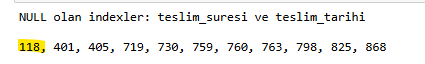

In [161]:
df_kategori.loc[[118]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
118,OTOKLAV,YURTDIŞI,2018/293,2018-09-19,RAWAAT-ALMAJARRA COMPANY,RAWAAT-ALMAJARRA COMPANY,IRAK,STR 5510 D,250 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,250 LT,2018/01-120,NaN,NaN,NaN,NaN


In [162]:
df_kategori[(df_kategori['il'] == 'IRAK') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
118,OTOKLAV,YURTDIŞI,2018/293,2018-09-19,RAWAAT-ALMAJARRA COMPANY,RAWAAT-ALMAJARRA COMPANY,IRAK,STR 5510 D,250 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,250 LT,2018/01-120,NaN,NaN,NaN,NaN
868,OTOKLAV,YURTDIŞI,2022/456,2022-11-09,IRAK,IRAK,IRAK,GOLDBERG 675 D,675 LT ÇİFT KAPILI OTOKLAV CİHAZI,675 LT,2022/01-14064,NaN,NaN,NaN,NaN


In [163]:
# IRAK'a - gonderilen 250 LT OTOKLAV Cihazlari Ortalama 'teslim_suresi':

selected_rows = df_kategori[(df_kategori['il'] == 'IRAK')
                            #&(df_kategori['litre'] == '250 LT')
                          ]

print('IRAK - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

IRAK - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  38.44897959183673


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
64,OTOKLAV,YURTDIŞI,2018/120,2018-07-25,MODERN MEDİCAL,MODERN MEDİCAL,IRAK,GOLDBERG 550 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2018/01-066,2.0,2018-07-27,NaN,NaN
118,OTOKLAV,YURTDIŞI,2018/293,2018-09-19,RAWAAT-ALMAJARRA COMPANY,RAWAAT-ALMAJARRA COMPANY,IRAK,STR 5510 D,250 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,250 LT,2018/01-120,NaN,NaN,NaN,NaN
134,OTOKLAV,YURTDIŞI,2018/227,2018-12-06,SHİNYAR COMPANY FOR GENERAL,SHİNYAR COMPANY FOR GENERAL,IRAK,GOLDBERG 550 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2018/01-137,30.0,2019-01-05,NaN,NaN
135,OTOKLAV,YURTDIŞI,2018/333,2018-12-06,SHİNYAR COMPANY FOR GENERAL,SHİNYAR COMPANY FOR GENERAL,IRAK,GOLDBERG 550 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-138,30.0,2018-11-15,NaN,NaN
137,OTOKLAV,YURTDIŞI,2018/057,2018-01-05,MERİVAN,MERİVAN,IRAK,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,NaN,16.0,2018-11-28,NaN,NaN
138,OTOKLAV,YURTDIŞI,2018/063,2018-01-23,MERİVAN,MERİVAN,IRAK,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,NaN,17.0,2019-01-12,NaN,NaN
188,OTOKLAV,YURTDIŞI,2019/191,2019-08-19,ALNOOR,ALNOOR,IRAK,STR 4410 S,200 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,200 LT,2019/01-057,27.0,2019-09-15,NaN,NaN
189,OTOKLAV,YURTDIŞI,2019/192,2019-08-19,ALNOOR,ALNOOR,IRAK,STR 4410 S,200 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,200 LT,2019/01-058,27.0,2019-09-15,NaN,NaN
190,OTOKLAV,YURTDIŞI,2019/193,2019-08-19,ALNOOR,ALNOOR,IRAK,STR 4410 S,200 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,200 LT,2019/01-059,27.0,2019-09-15,NaN,NaN
191,OTOKLAV,YURTDIŞI,2019/194,2019-08-19,ALNOOR,ALNOOR,IRAK,STR 4410 S,200 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,200 LT,2019/01-060,27.0,2019-09-15,NaN,NaN


In [164]:
# Filling Missings
# IRAK - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  38 gun olarak doldurma;

# 'il' sütununda 'IRAK' olan ve 'teslim_suresi' sütunu null olan satırları bulup 38 değerini atama
df_kategori.loc[(df_kategori['il'] == 'IRAK') &
                (df_kategori['teslim_suresi'].isna()), 'teslim_suresi'] = 38

#kontrol
df_kategori[(df_kategori['il'] == 'IRAK') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


- IRAK'a yapilan Otoklav Cihaz Teslimat Suresi ortalama 38 gun oldugu goruldu
- IRAK - Otoklav cihaz gonderimi yapilan ve teslimat suresi(gun) belirtilmeyen satirda `teslim_suresi = 38` olarak dolduruldu.

### 401.idx: KASTAMONU - 300 LT OTOKLAV
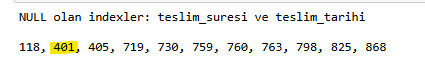

In [165]:
df_kategori.loc[[401]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
401,OTOKLAV,BAĞIŞ,2019/321,2020-09-23,HİKMET GÖKÇE,TOSYA DEVLET HASTANESİ,KASTAMONU,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-155,NaN,NaN,NaN,NaN


In [166]:
df_kategori[(df_kategori['il'] == 'KASTAMONU') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
401,OTOKLAV,BAĞIŞ,2019/321,2020-09-23,HİKMET GÖKÇE,TOSYA DEVLET HASTANESİ,KASTAMONU,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-155,NaN,NaN,NaN,NaN


In [167]:
df_kategori[(df_kategori['il'] == 'KASTAMONU')]

# KASTAMONU'na gonderilen- OTOKLAV CIHAZI sadece 2 Farkli Kuruma yapilmis. 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
401,OTOKLAV,BAĞIŞ,2019/321,2020-09-23,HİKMET GÖKÇE,TOSYA DEVLET HASTANESİ,KASTAMONU,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-155,NaN,NaN,NaN,NaN
652,OTOKLAV,ÖZEL,2021/251,2021-08-31,BAŞKENT HİTİT MEDİKAL SAĞ.HİZ.A.Ş.,BAŞKENT HİTİT MEDİKAL SAĞ.HİZ.A.Ş.,KASTAMONU,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2021/01-155,30.0,2021-09-30,NaN,NaN


In [168]:
# KASTAMONU - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'KASTAMONU')]

print('KASTAMONU - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

KASTAMONU - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  30.0


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
401,OTOKLAV,BAĞIŞ,2019/321,2020-09-23,HİKMET GÖKÇE,TOSYA DEVLET HASTANESİ,KASTAMONU,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-155,NaN,NaN,NaN,NaN
652,OTOKLAV,ÖZEL,2021/251,2021-08-31,BAŞKENT HİTİT MEDİKAL SAĞ.HİZ.A.Ş.,BAŞKENT HİTİT MEDİKAL SAĞ.HİZ.A.Ş.,KASTAMONU,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2021/01-155,30.0,2021-09-30,NaN,NaN


In [169]:
# Fill Missing;
# KASTAMONU - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  30.0 olarak tespit edildi

df_kategori.loc[(df_kategori['il'] == 'KASTAMONU') &
                (df_kategori['teslim_suresi'].isna()), 'teslim_suresi'] = 30

# check
df_kategori[(df_kategori['il'] == 'KASTAMONU') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 405.idx: MERSİN
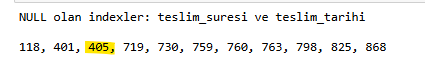

In [170]:
df_kategori.loc[[405]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
405,OTOKLAV,ÖZEL,2019/262,2020-10-01,MERSİN SU HASTANESİ,MERSU ÖZEL SAĞLIK HİZMETLERİ TİC.LTD.ŞTİ.,MERSİN,STR 75 V,75 LT VAKUMLU DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-159,NaN,NaN,NaN,NaN


In [171]:
df_kategori[(df_kategori['il'] == 'MERSİN') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
405,OTOKLAV,ÖZEL,2019/262,2020-10-01,MERSİN SU HASTANESİ,MERSU ÖZEL SAĞLIK HİZMETLERİ TİC.LTD.ŞTİ.,MERSİN,STR 75 V,75 LT VAKUMLU DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-159,NaN,NaN,NaN,NaN


In [173]:
# MERSİN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'MERSİN')]

print('MERSİN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

MERSİN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  40.09090909090909


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
154,OTOKLAV,ÖZEL,2019/029,2019-07-19,ÖZEL YENİŞEHİR HASTANESİ,ANADOLU ÖZEL TIP HİZMETLERİ SAN.TİC.AŞ.,MERSİN,STR 6610 D,422 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2019/01-031,13.0,2019-08-01,NaN,NaN
203,OTOKLAV,ÖZEL,2019/211,2019-09-11,MEDİKALTEST HASTANE VE LABORATUVAR CİHAZLARI-E...,MEDİKALTEST HASTANE VE LABORATUVAR CİHAZLARI-E...,MERSİN,STR 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2019/01-051,10.0,2019-09-21,NaN,NaN
280,OTOKLAV,DMO,2020/068,2020-02-17,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,MERSİN SİLİFKE DEVLET HASTANESİ,MERSİN,ERS 6613 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2020/01-035,64.0,2020-04-21,NaN,NaN
405,OTOKLAV,ÖZEL,2019/262,2020-10-01,MERSİN SU HASTANESİ,MERSU ÖZEL SAĞLIK HİZMETLERİ TİC.LTD.ŞTİ.,MERSİN,STR 75 V,75 LT VAKUMLU DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-159,NaN,NaN,NaN,NaN
665,OTOKLAV,DMO,2021/295,2021-11-19,DMO GENEL MÜDÜRLÜĞÜ,TARSUS DEVLET HASTANESİ,MERSİN,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2021/01-014,63.0,2021-09-17,NaN,NaN
666,OTOKLAV,DMO,2021/296,2021-11-19,DMO GENEL MÜDÜRLÜĞÜ,TARSUS DEVLET HASTANESİ,MERSİN,ERS 7715 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2021/01-015,62.0,2021-09-18,NaN,NaN
684,OTOKLAV,DMO,2021/365,2021-10-08,DMO GENEL MÜDÜRLÜĞÜ,KUZEY KIBRIS TÜRK CUMHURİYETİ,MERSİN,ERS 6613 S,550 LT TEK KAPILI OTOKLAV CİHAZI,550 LT,2021/01-167,24.0,2021-11-01,NaN,NaN
761,OTOKLAV,ÖZEL,2022/149,2022-04-07,BOZYAZI DEVLET HASTANESİ,BOZYAZI DEVLET HASTANESİ,MERSİN,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-017,15.0,2022-04-22,NaN,NaN
800,OTOKLAV,ÖZEL,2022/308,2022-07-19,TEKEN ELEKTRİK ENERJİ ÜRETİM İNŞAAT TİCARET A. Ş.,MERSİN ÜNİVERSİTESİ DİŞ HEKİMLİĞİ FAKÜLTESİ,MERSİN,STR 7712 D,675 LT ÇİFT KAPILI OTOKLAV CİHAZI,675 LT,2022/01-073,30.0,2022-06-18,NaN,NaN
801,OTOKLAV,ÖZEL,2022/309,2022-07-19,TEKEN ELEKTRİK ENERJİ ÜRETİM İNŞAAT TİCARET A. Ş.,MERSİN ÜNİVERSİTESİ DİŞ HEKİMLİĞİ FAKÜLTESİ,MERSİN,STR 7712 D,675 LT ÇİFT KAPILI OTOKLAV CİHAZI,675 LT,2022/01-074,30.0,2022-06-18,NaN,NaN


In [174]:
# Fill Missing;
# MERSİN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  40.09 olarak tespit edildi

df_kategori.loc[(df_kategori['il'] == 'MERSİN') &
                (df_kategori['teslim_suresi'].isna()), 'teslim_suresi'] = 40

# check
df_kategori[(df_kategori['il'] == 'MERSİN') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 719.idx: LİBYA
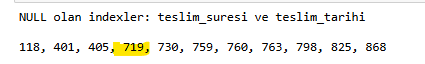

In [175]:
df_kategori.loc[[719]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
719,OTOKLAV,YURTDIŞI,2022/041,2022-05-18,LİBYA,LİBYA,LİBYA,GOLDBERG 300 S,300 LT TEK KAPILI OTOKLAV CİHAZI,300 LT,2022/01-050,NaN,NaN,NaN,NaN


In [176]:
df_kategori[(df_kategori['il'] == 'LİBYA') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
719,OTOKLAV,YURTDIŞI,2022/041,2022-05-18,LİBYA,LİBYA,LİBYA,GOLDBERG 300 S,300 LT TEK KAPILI OTOKLAV CİHAZI,300 LT,2022/01-050,NaN,NaN,NaN,NaN


In [177]:
# LİBYA - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'LİBYA')]

print('LİBYA - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

LİBYA - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  43.2


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
168,OTOKLAV,YURTDIŞI,2019/087,2019-05-08,ALHİKMA HOSPİTAL,ALHİKMA HOSPİTAL,LİBYA,GOLDBERG 300 D,300 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,300 LT,2019/01-021,43.0,2019-06-20,NaN,NaN
689,OTOKLAV,YURTDIŞI,2021/389,2021-11-12,LİBYA,LİBYA,LİBYA,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2021/01-069,34.0,2021-12-16,NaN,NaN
690,OTOKLAV,YURTDIŞI,2021/390,2021-11-12,LİBYA,LİBYA,LİBYA,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2021/01-070,34.0,2021-12-16,NaN,NaN
694,OTOKLAV,YURTDIŞI,2021/409,2021-11-12,LİBYA,LİBYA,LİBYA,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2021/01-088,77.0,2022-01-28,NaN,NaN
695,OTOKLAV,YURTDIŞI,2021/410,2021-11-12,LİBYA,LİBYA,LİBYA,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2021/01-089,78.0,2022-01-29,NaN,NaN
719,OTOKLAV,YURTDIŞI,2022/041,2022-05-18,LİBYA,LİBYA,LİBYA,GOLDBERG 300 S,300 LT TEK KAPILI OTOKLAV CİHAZI,300 LT,2022/01-050,NaN,NaN,NaN,NaN
904,OTOKLAV,YURTDIŞI,2022/113,2023-01-23,LİBYA,LİBYA,LİBYA,GOLDBERG 250 S,250 LT TEK KAPILI OTOKLAV CİHAZI 35X70,250 LT,2023/01-007,30.0,2023-02-09,NaN,NaN
965,OTOKLAV,YURTDIŞI,2023/120,2023-12-06,LİBYA,LİBYA,LİBYA,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKAV CİHAZI,250 LT,2023/01-129,65.0,2023-12-12,NaN,NaN
1176,OKSIJEN,YURTDIŞI,2020/048,2020-02-05,AL MASARA HOSPİTAL,AL MASARA HOSPİTAL,LİBYA,OXYGOLD 75,NaN,75 LT,2020/06-001,30.0,2020-03-06,NaN,NaN
1177,OKSIJEN,YURTDIŞI,2020/049,2020-02-05,AL MASARA HOSPİTAL,AL MASARA HOSPİTAL,LİBYA,OXYGOLD 3,NaN,NaN,2020/06-002,30.0,2020-03-06,NaN,NaN


In [178]:
# Fill Missing;
# LİBYA - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  43 GUN olarak tespit edildi

df_kategori.loc[(df_kategori['il'] == 'LİBYA') &
                (df_kategori['teslim_suresi'].isna()), 'teslim_suresi'] = 43

# check
df_kategori[(df_kategori['il'] == 'LİBYA') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 730.idx: TRABZON
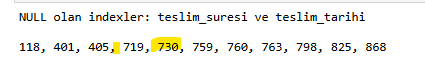

In [179]:
df_kategori.loc[[730]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
730,OTOKLAV,ÖZEL,2022/060,2022-04-07,PRUVA SAĞLIK ÜRÜNLERİ TİC. LTD. ŞTİ.,TRABZON,TRABZON,STR 6613 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2022/01-029,NaN,NaN,NaN,NaN


In [180]:
df_kategori[(df_kategori['il'] == 'TRABZON') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
730,OTOKLAV,ÖZEL,2022/060,2022-04-07,PRUVA SAĞLIK ÜRÜNLERİ TİC. LTD. ŞTİ.,TRABZON,TRABZON,STR 6613 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2022/01-029,NaN,NaN,NaN,NaN


In [181]:
# TRABZON - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'TRABZON')]

print('TRABZON - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

TRABZON - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  43.5


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
218,OTOKLAV,DMO,2019/255,2019-11-25,DMO TRABZON BÖLGE MÜDÜRLÜĞÜ,VAKFIKEBİR DEVLET HASTANESİ,TRABZON,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2019/01-085,59.0,2020-01-23,NaN,NaN
496,OTOKLAV,ÖZEL,2020/473,2020-11-13,S.B.Ü. AHİ EVREN GÖĞÜS KALP VE DAMAR CERRAHİSİ...,S.B.Ü. AHİ EVREN GÖĞÜS KALP VE DAMAR CERRAHİSİ...,TRABZON,STR 75 V,75 LT VAKUMLU DİK TİP OTOKLAV CİHAZI,75 LT,2020/01-250,28.0,2020-12-11,NaN,NaN
730,OTOKLAV,ÖZEL,2022/060,2022-04-07,PRUVA SAĞLIK ÜRÜNLERİ TİC. LTD. ŞTİ.,TRABZON,TRABZON,STR 6613 D,550 LT ÇİFT KAPILI OTOKLAV CİHAZI,550 LT,2022/01-029,NaN,NaN,NaN,NaN


In [182]:
# Fill Missing;
# TRABZON - OTOKLAV CIHAZI - 550LT - ORTALAMA TESLIM SURESI(gun):  59 GUN olarak tespit edildi

df_kategori.loc[(df_kategori['il'] == 'TRABZON') &
                (df_kategori['teslim_suresi'].isna()), 'teslim_suresi'] = 59

# check
df_kategori[(df_kategori['il'] == 'TRABZON') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 759.idx: ARTVİN
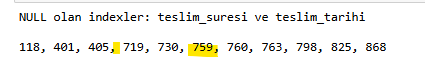

In [183]:
df_kategori.loc[[759]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
759,OTOKLAV,DMO,2022/150,2022-03-08,DMO ERZURUM İRTİBAT BÜROSU,ARTVİN YUSUFELİ DEVLET HASTANESİ,ARTVİN,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-026,NaN,NaN,NaN,NaN


In [184]:
df_kategori[(df_kategori['il'] == 'ARTVİN') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
759,OTOKLAV,DMO,2022/150,2022-03-08,DMO ERZURUM İRTİBAT BÜROSU,ARTVİN YUSUFELİ DEVLET HASTANESİ,ARTVİN,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-026,NaN,NaN,NaN,NaN


In [185]:
# ARTVİN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'ARTVİN')]

print('ARTVİN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

ARTVİN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  65.0


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
759,OTOKLAV,DMO,2022/150,2022-03-08,DMO ERZURUM İRTİBAT BÜROSU,ARTVİN YUSUFELİ DEVLET HASTANESİ,ARTVİN,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-026,NaN,NaN,NaN,NaN
969,OTOKLAV,DMO,2023/126,2023-03-16,DMO TRABZON BÖLGE MÜDÜRLÜĞÜ,ARTVİN AĞIZ VE DİŞ SAĞLIĞI MERKEZİ,ARTVİN,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2023/01-041,65.0,2023-05-20,NaN,NaN


In [186]:
# Fill Missing;
# ARTVİN - OTOKLAV CIHAZI - 300LT - ORTALAMA TESLIM SURESI(gun):  65 GUN olarak tespit edildi

df_kategori.loc[(df_kategori['il'] == 'ARTVİN') &
                (df_kategori['teslim_suresi'].isna()), 'teslim_suresi'] = 65

# check
df_kategori[(df_kategori['il'] == 'ARTVİN') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 760.idx: İSTANBUL
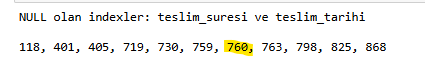

In [187]:
df_kategori.loc[[760]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
760,OTOKLAV,ÖZEL,2022/148,2022-03-18,BAŞAKŞEHİR TIP MERKEZİ,BAŞAKŞEHİR TIP MERKEZİ,İSTANBUL,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-012,NaN,NaN,NaN,NaN


In [188]:
# İSTANBUL - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'İSTANBUL')
                           &(df_kategori['litre'] == '300 LT')
                          # &(df_kategori['kurulum_yeri'] == 'BAŞAKŞEHİR TIP MERKEZİ')
                           ]

print('İSTANBUL - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

İSTANBUL - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  31.428571428571427


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
26,OTOKLAV,DMO,2018/083,2018-05-03,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,BÜYÜKÇEKMECE DEVLET HASTANESİ,İSTANBUL,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-027,55.0,2018-06-26,NaN,NaN
36,OTOKLAV,ÖZEL,2018/169,2018-05-26,ADERANS TEKNİK TAAH.İNŞ.SAN.TİC.LTD.ŞTİ.,İSTANBUL MEDENİYET ÜNİVERSİTESİ,İSTANBUL,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-037,53.0,2018-07-18,NaN,NaN
136,OTOKLAV,ÖZEL,2018/313,2018-12-24,A HOSPİTALSAĞLIKHİZ.TİC.LTD.ŞTİ.,A HOSPİTALSAĞLIKHİZ.TİC.LTD.ŞTİ.,İSTANBUL,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2018/01-139,15.0,2018-12-13,NaN,NaN
283,OTOKLAV,ÖZEL,2020/070,2020-11-02,KAPADOKYA ÜNİVERSİTESİ,KAPADOKYA ÜNİVERSİTESİ,İSTANBUL,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-037,2.0,2020-11-04,NaN,NaN
418,OTOKLAV,ÖZEL,2020/069,2020-10-20,ERC ESTETİK TURİZM SAĞLIK,ERC ESTETİK TURİZM SAĞLIK,İSTANBUL,STR 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2020/01-172,20.0,2020-11-09,NaN,NaN
760,OTOKLAV,ÖZEL,2022/148,2022-03-18,BAŞAKŞEHİR TIP MERKEZİ,BAŞAKŞEHİR TIP MERKEZİ,İSTANBUL,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-012,NaN,NaN,NaN,NaN
1151,OTOKLAV,ÖZEL,2023/374,2024-09-12,OPTİMED SAĞLIK HİZMETLERİ SAN. TİC. A.Ş.,OPTİMED SAĞLIK HİZMETLERİ SAN.TİC. A.Ş.,İSTANBUL,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2024/01-107,10.0,2024-09-24,NaN,NaN
1169,OTOKLAV,DMO,2023/369,2024-04-29,BEYLİKDÜZÜ ADSM,BEYLİKDÜZÜ ADSM,İSTANBUL,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2024/01-100,65.0,2024-09-21,NaN,NaN


In [189]:
# Fill Missing;
# İSTANBUL - OTOKLAV CIHAZI - 300LT - ORTALAMA TESLIM SURESI(gun):  31 GUN olarak tespit edildi

df_kategori.loc[
                (df_kategori['kategori'] == 'OTOKLAV') & 
                (df_kategori['il'] == 'İSTANBUL')&
                (df_kategori['kurulum_yeri'] == 'BAŞAKŞEHİR TIP MERKEZİ'),
'teslim_suresi'] = 31

# check
df_kategori.loc[[760]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
760,OTOKLAV,ÖZEL,2022/148,2022-03-18,BAŞAKŞEHİR TIP MERKEZİ,BAŞAKŞEHİR TIP MERKEZİ,İSTANBUL,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-012,31.0,NaN,NaN,NaN


In [190]:
df_kategori[(df_kategori['il'] == 'İSTANBUL') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 763.idx: AZERBAYCAN
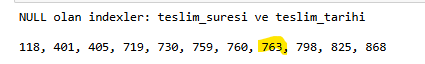

In [191]:
df_kategori.loc[[763]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
763,OTOKLAV,YURTDIŞI,2022/152,2022-06-22,AZERBAYCAN,AZERBAYCAN,AZERBAYCAN,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-066,NaN,NaN,NaN,NaN


In [192]:
# AZERBAYCAN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'AZERBAYCAN')
                           &(df_kategori['litre'] == '300 LT')
                           &(df_kategori['siparis_tarihi'] == '2022-06-22')
                           ]

print('AZERBAYCAN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

AZERBAYCAN - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  17.0


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
762,OTOKLAV,YURTDIŞI,2022/151,2022-06-22,AZERBAYCAN,AZERBAYCAN,AZERBAYCAN,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-062,17.0,2022-07-09,NaN,NaN
763,OTOKLAV,YURTDIŞI,2022/152,2022-06-22,AZERBAYCAN,AZERBAYCAN,AZERBAYCAN,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-066,NaN,NaN,NaN,NaN


In [193]:
# Fill Missing;
# AZERBAYCAN - OTOKLAV CIHAZI - 300LT - ['siparis_tarihi'] == '2022-06-22' 
# TESLIM SURESI(gun):  17 GUN oldugu tespit edildi

df_kategori.loc[
                (df_kategori['kategori'] == 'OTOKLAV') & 
                (df_kategori['il'] == 'AZERBAYCAN')&
                (df_kategori['siparis_tarihi'] == '2022-06-22'),
'teslim_suresi'] = 17

# check
df_kategori[(df_kategori['il'] == 'AZERBAYCAN') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 798.idx: AKSARAY
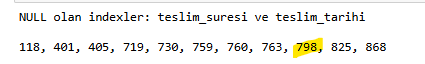

In [194]:
df_kategori.loc[[798]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
798,OTOKLAV,DMO,2022/047,2022-06-27,DMO MERSİN İRTİBAT BÜROSU,AKSARAY ÜNİVERSİTESİ REKTÖRLÜĞÜ İDARİ VE MALİ ...,AKSARAY,ERS 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2022/01-049,NaN,NaN,NaN,NaN


In [195]:
# AKSARAY - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'AKSARAY')
                           &(df_kategori['satis_turu'] == 'DMO')
                          # &(df_kategori['kurulum_yeri'] == 'DMO MERSİN BÖLGE MÜDÜRLÜĞÜ')
                           ]

print('AKSARAY - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

AKSARAY - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  50.0


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
30,OTOKLAV,DMO,2018/056,2018-05-08,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-031,50.0,2018-06-27,NaN,NaN
31,OTOKLAV,DMO,2018/061,2018-05-08,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2018/01-032,50.0,2018-06-27,NaN,NaN
798,OTOKLAV,DMO,2022/047,2022-06-27,DMO MERSİN İRTİBAT BÜROSU,AKSARAY ÜNİVERSİTESİ REKTÖRLÜĞÜ İDARİ VE MALİ ...,AKSARAY,ERS 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2022/01-049,NaN,NaN,NaN,NaN


In [196]:
# Fill Missing;
# AKSARAY - OTOKLAV CIHAZI - DMO 
# TESLIM SURESI(gun):  50 GUN oldugu tespit edildi

df_kategori.loc[
                (df_kategori['kategori'] == 'OTOKLAV') & 
                (df_kategori['il'] == 'AKSARAY')&
                (df_kategori['siparisi_veren'] == 'DMO MERSİN İRTİBAT BÜROSU'),
'teslim_suresi'] = 50

# check
df_kategori[(df_kategori['il'] == 'AKSARAY') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


### 825.idx: ARNAVUTLUK
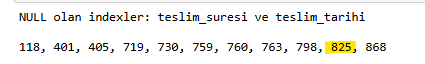

In [197]:
df_kategori.loc[[825]]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
825,OTOKLAV,YURTDIŞI,2022/400,2022-11-02,ARNAVUTLUK,ARNAVUTLUK,ARNAVUTLUK,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-124,NaN,NaN,NaN,NaN


In [198]:
# ARNAVUTLUK - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun);

selected_rows = df_kategori[(df_kategori['il'] == 'ARNAVUTLUK')
                           ]

print('ARNAVUTLUK - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun): ', selected_rows['teslim_suresi'].mean())

selected_rows

ARNAVUTLUK - OTOKLAV CIHAZI - ORTALAMA TESLIM SURESI(gun):  37.0


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
531,OTOKLAV,DMO,2020/504,2021-02-12,DMO GENEL MÜDÜRLÜĞÜ,ARNAVUTLUK FİER HASTANESİ,ARNAVUTLUK,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2021/01-054,37.0,2021-03-21,NaN,NaN
825,OTOKLAV,YURTDIŞI,2022/400,2022-11-02,ARNAVUTLUK,ARNAVUTLUK,ARNAVUTLUK,GOLDBERG 300 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2022/01-124,NaN,NaN,NaN,NaN


- Arnavutluk Fier Hastanesi, Türkiye'nin destekleriyle Arnavutluk'un Fier kentinde kurulan bir hastanedir. Açılışı 21 Nisan 2021 tarihinde gerçekleştirilmiştir. Hastane, Arnavutluk'un güneybatısında yer alan Fier şehrinde bulunmakta ve Arnavutluk'un sağlık sistemine katkı sağlamak amacıyla inşa edilmiştir. 

In [199]:
# Fill Missing;
# ARNAVUTLUK - OTOKLAV CIHAZI - DMO 
# TESLIM SURESI(gun):  37 GUN oldugu tespit edildi

df_kategori.loc[
                (df_kategori['kategori'] == 'OTOKLAV') & 
                (df_kategori['il'] == 'ARNAVUTLUK')&
                (df_kategori['siparisi_veren'] == 'ARNAVUTLUK'),
'teslim_suresi'] = 37

# check
df_kategori[(df_kategori['il'] == 'ARNAVUTLUK') & (df_kategori['teslim_suresi'].isna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


In [202]:
# CHECK

# teslim_tarihi sütununda NaN olan satırların index numaralarını yanyana listeleme
na_index_list = df_kategori[df_kategori['teslim_suresi'].isna()].index.tolist()

# Sonucu yanyana liste olarak yazdırma
print('NULL olan indexler: teslim_suresi\n')
print(", ".join(map(str, na_index_list)))

NULL olan indexler: teslim_suresi




- Teslim_suresi sutunundaki tum NULL degerler; 
   - Gonderilen cihaz, 
   - kurum yeri, 
   - il, 
   - siparis tarihi 
gibi ortak bulunan datalara gore dolduruldu.
- Next step: 
    - Mevcut siparis_tarihi ve teslim_suresi toplanarak kalan TESLIM_TARIHI sutun NULL tarihleri hesaplanip doldurulacak.

In [ ]:
# BURADA KALDIMMMMM

In [167]:
# TARIH ICEREN SUTUNLAR; deneme

tarih_df = df_kategori[['siparis_tarihi','teslim_suresi','teslim_tarihi']]

print(tarih_df.isna().sum())

tarih_df[tarih_df['teslim_tarihi'].isna()] 

# EN SON TESLIM_TARIHI SUTUNU DA TEMIZLENDIKTEN SONRA TOPLU DOLDURMA YAPACAGIM 3 SUTUN ARASINDA

siparis_tarihi      0
teslim_suresi     228
teslim_tarihi     265
dtype: int64


,siparis_tarihi,teslim_suresi,teslim_tarihi
0,2018-01-04,30.0,NaT
2,2017-12-25,20.0,NaT
3,2018-01-22,20.0,NaT
4,2018-01-29,20.0,NaT
5,2018-01-05,20.0,NaT
6,2018-02-06,20.0,NaT
8,2018-01-29,20.0,NaT
9,2018-01-05,20.0,NaT
11,2018-02-22,20.0,NaT
12,2018-02-27,20.0,NaT


In [168]:
# Örnek olarak fonksiyonu DataFrame üzerinde çalıştırma
calculate_missing_dates(tarih_df)

print(tarih_df.isna().sum())

# Sonuçları kontrol etme
tarih_df[tarih_df['teslim_tarihi'].isna()] 

siparis_tarihi     0
teslim_suresi     75
teslim_tarihi     75
dtype: int64


,siparis_tarihi,teslim_suresi,teslim_tarihi
118,2018-09-19,NaN,NaT
401,2020-09-23,NaN,NaT
405,2020-10-01,NaN,NaT
705,2022-01-06,NaN,NaT
706,2023-02-15,NaN,NaT
707,2022-01-06,NaN,NaT
708,2022-01-06,NaN,NaT
709,2022-01-06,NaN,NaT
710,2022-01-06,NaN,NaT
711,2022-01-06,NaN,NaT


## **irsaliye_tarihi**

- Bu Feature kullanilmayacak
- Sadece yazi ile aciklamalar girilmis, tarih bilgisi icermemektedir.

İrsaliye, ürünlerin taşınması sırasında düzenlenen bir sevk belgesidir ve irsaliye_tarihi de bu belgenin düzenlendiği tarihi ifade eder. Genellikle ürünlerin sevkiyatının başlatıldığı tarih olarak kabul edilir ve teslimatın başlama noktasını gösterir. Bu sütun, ürünlerin kargoya verildiği veya nakliye sürecinin başlatıldığı günü belirtir ve teslim sürecinin farklı bir aşamasını temsil eder.

In [29]:
utils.get_value_count()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: irsaliye_tarihi


,irsaliye_tarihi,counts,percent
0,cihaz gitti.,1,12.50%
1,kazan yok - nerede,1,12.50%
2,DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.,1,12.50%
3,NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDE...,1,12.50%
4,SİPARİŞİ GELMEDİ,1,12.50%
5,6/19/2024 0:00,1,12.50%
6,KASET KARŞILIĞI GÖNDERİLMİŞTİR.,1,12.50%
7,GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.,1,12.50%


### Anomalies

In [23]:
utils.find_non_numeric_values() #irsaliye_tarihi 

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' KASET KARŞILIĞI GÖNDERİLMİŞTİR. GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.',
 '/',
 ':',
 'cihaz gitti. kazan yok - nerede DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI. NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ. SİPARİŞİ GELMEDİ '}

In [24]:
utils.detect_anomalies()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız:
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda alfasayısal olmayan karakterler tespit edildi:


'cihaz gitti., kazan yok - nerede, DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI., NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ., SİPARİŞİ GELMEDİ, 6/19/2024 0:00, KASET KARŞILIĞI GÖNDERİLMİŞTİR., GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.'

### Missings

In [172]:
df_kategori[df_kategori['irsaliye_tarihi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,OTOKLAV,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30.0,2018-02-03,NaN,NaN
1,OTOKLAV,DMO,2018/072,2017-12-28,DMO GENEL MÜDÜRLÜK,T.C. GIDA TARIM VE HAYV. BAKANLIĞI GIDA VE KON...,ANKARA,7717 S,2000 LT ÇİFT KAPILI LABARATUVAR TİP BUHAR STER...,2000 LİTRE,2018/01-002,100.0,2018-06-22,NaN,NaN
2,OTOKLAV,ÖZEL,2018/071,2017-12-25,BURSA RETİNA GÖZ MERKEZİ,BURSA RETİNA GÖZ MERKEZİ,BURSA,ERS 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LİTRE,2018/01-003,20.0,2018-01-14,NaN,NaN
3,OTOKLAV,YURTDIŞI,2018/064,2018-01-22,BAHRİ GROUP CO.,BAHRİ GROUP CO.,KUZEY IRAK,STR 75 V,75 LT VAKUMLU OTOKLAV CİHAZI,75 LT,2018/01-004,20.0,2018-02-11,NaN,NaN
4,OTOKLAV,DMO,2018/107,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-005,20.0,2018-02-18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,OKSIJEN,YURTDIŞI,2022/364,2022-02-02,IRAK,IRAK,IRAK,GOLDBERG 22 V,22 OKSİJEN ÜRETİM SİSTEMİ,NaN,2022/06-006,267.0,2022-10-27,NaN,NaN
1309,OKSIJEN,YURTDIŞI,2022/156,2024-02-27,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 37,OXY-GOLD 37 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-001,60.0,2024-03-11,NaN,8.700000e+12
1310,OKSIJEN,YURTDIŞI,2022/161,2022-03-03,STOK,STOK,STOK,OXY-GOLD 30,OXY-GOLD 30 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-003,60.0,2024-03-12,NaN,8.700000e+12
1311,OKSIJEN,YURTDIŞI,2022/163,2024-06-11,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 30,OXY-GOLD 30 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-005,60.0,2024-06-13,NaN,8.700000e+12


In [173]:
df_kategori[df_kategori['irsaliye_tarihi'] == 'cihaz gitti.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
813,OTOKLAV,DMO,2022/276,2022-10-04,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,İSTANBUL PROF. DR. CEMİL TAŞÇIOĞLU ŞEHİR HASTA...,İSTANBUL,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-086,65.0,2022-12-08,cihaz gitti.,NaN


In [32]:
df_kategori[df_kategori['seri_no'] == '2022/01-086']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1288,OTOKLAV,DMO,2022/276,10/4/2022,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,İSTANBUL PROF. DR. CEMİL TAŞÇIOĞLU ŞEHİR HASTA...,İSTANBUL,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-086,65 GÜN,12/8/2022,cihaz gitti.,NaN,NaN,NaN,NaN


In [175]:
df_kategori[df_kategori['irsaliye_tarihi'] == 'kazan yok - nerede']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
839,OTOKLAV,2023 YILINA AKTARILDI,2022/326,2022-08-20,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,NaN,NaN,422 LT TEK KAPILI OTOKLAV CİHAZI,422 LT,NaN,NaN,NaT,kazan yok - nerede,NaN


In [176]:
df_kategori[df_kategori['siparis_no'] == '2022/326']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
839,OTOKLAV,2023 YILINA AKTARILDI,2022/326,2022-08-20,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,NaN,NaN,422 LT TEK KAPILI OTOKLAV CİHAZI,422 LT,NaN,NaN,NaT,kazan yok - nerede,NaN
974,OTOKLAV,YURTDIŞI,2022/326,2023-03-09,VEST HOSPİTAL MMC - AZERBAYCAN,AZERBAYCAN,AZERBAYCAN,GOLDBERG 422 S,422 LT TEK KAPILI OTOKLAV CİHAZI,422 LT,2023/01-040,30.0,2023-04-08,NaN,NaN


In [177]:
df_kategori[df_kategori['irsaliye_tarihi'] == 'DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
860,OTOKLAV,2023 YILINA AKTARILDI,2022/357,2022-12-06,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKAV CİHAZI,250 LT,2022/01-190,4.0,2022-12-10,DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.,NaN


In [178]:
df_kategori[df_kategori['seri_no'] == '2022/01-190']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
860,OTOKLAV,2023 YILINA AKTARILDI,2022/357,2022-12-06,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKAV CİHAZI,250 LT,2022/01-190,4.0,2022-12-10,DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.,NaN
985,OTOKLAV,YURTDIŞI,2022/357,2023-05-31,CEZAYİR,CEZAYİR,CEZAYİR,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKAV CİHAZI,250 LT,2022/01-190,45.0,2022-12-10,NaN,NaN


In [179]:
# 'irsaliye_tarihi' sütununda belirtilen ifadeyi içeren satırları filtreleme
df_kategori[df_kategori['irsaliye_tarihi'].str.contains('NOT: DEPREM BÖLGESİ', na=False, case=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1029,OTOKLAV,DMO,2023/116,2023-03-08,DMO MERSİN İRTİBAT BÜROSU,HATAY DEPREM BÖLGESİ DEPO (NİĞDE EĞİTİM VE ARA...,NİĞDE,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2023/01-038,65.0,2023-05-12,NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDE...,NaN


In [181]:
df_kategori[df_kategori['seri_no'] == '2023/01-038']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1029,OTOKLAV,DMO,2023/116,2023-03-08,DMO MERSİN İRTİBAT BÜROSU,HATAY DEPREM BÖLGESİ DEPO (NİĞDE EĞİTİM VE ARA...,NİĞDE,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2023/01-038,65.0,2023-05-12,NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDE...,NaN


In [182]:
df_kategori[df_kategori['irsaliye_tarihi'] == 'SİPARİŞİ GELMEDİ']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1140,OTOKLAV,DMO,2024/038,2024-03-15,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MUĞLA MARMARİS DEVLET HASTANESİ,MUĞLA,ERS 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2024/01-068,65.0,2024-05-19,SİPARİŞİ GELMEDİ,NaN


In [183]:
df_kategori[df_kategori['seri_no'] == '2024/01-068']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1140,OTOKLAV,DMO,2024/038,2024-03-15,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MUĞLA MARMARİS DEVLET HASTANESİ,MUĞLA,ERS 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2024/01-068,65.0,2024-05-19,SİPARİŞİ GELMEDİ,NaN


In [184]:
df_kategori[df_kategori['irsaliye_tarihi'] == '2024-06-19 00:00:00']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


In [185]:
df_kategori[df_kategori['irsaliye_tarihi'] == 'KASET KARŞILIĞI GÖNDERİLMİŞTİR.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


In [186]:
df_kategori[df_kategori['irsaliye_tarihi'] == 'GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no


İrsaliye tarihi: 
- Otoklav ve Hidrojen Peroksit Kategorisinde bilgi girilmiştir.
- Sadece 2024/026 sipariş numaralı otoklav üründe tarih belirtilmiştir. Diğer bilgiler açıklama içerir. 
- Bu feature kullanılmayacak. 

## Distributions

- Feature'larinizin detayli analiz ve gorsellestirilmesi

## Correlations

## Feature Engineering

## Feature Selection
- Hangi feauture model icin kullanilmali-neden?

## Save Cleaned Data

# Bulgular ve Yorumlar

# Sonuçlar ve Öneriler